In [4]:
library("data.table")
library(pheatmap)
library(ggpubr)
library(ggfortify)
library(reshape)
library(dplyr)

In [5]:
cosmic_genes<-fread("cosmic_hallmarks.txt",header=F)
cosmic_genes<-as.data.frame(cosmic_genes)
colnames(cosmic_genes)<-c("gene")

cosmic_matched_genes<-fread("cosmic_driver_matched.txt",header=F)
cosmic_matched_genes<-as.data.frame(cosmic_matched_genes)
colnames(cosmic_matched_genes)<-c("gene")

In [6]:
for(file in list.files("/data/timonaj/cancer_as_wound/ppi_analysis/fractions_data/","^STRING_S_fractions_.*.csv")) {print(file)}

[1] "STRING_S_fractions_aandersoni_regen_down.csv"
[1] "STRING_S_fractions_aandersoni_regen_up.csv"
[1] "STRING_S_fractions_amaculatum_regen_down.csv"
[1] "STRING_S_fractions_amaculatum_regen_up.csv"
[1] "STRING_S_fractions_amexicanum_regen_down.csv"
[1] "STRING_S_fractions_amexicanum_regen_up.csv"
[1] "STRING_S_fractions_celegans_stress_down.csv"
[1] "STRING_S_fractions_celegans_stress_up.csv"
[1] "STRING_S_fractions_clupisFamiliaris_wound_down.csv"
[1] "STRING_S_fractions_clupisFamiliaris_wound_up.csv"
[1] "STRING_S_fractions_dmelanogaster_stress_down.csv"
[1] "STRING_S_fractions_dmelanogaster_stress_up.csv"
[1] "STRING_S_fractions_dmelanogaster_wound_down.csv"
[1] "STRING_S_fractions_dmelanogaster_wound_up.csv"
[1] "STRING_S_fractions_downregulated.regen.csv"
[1] "STRING_S_fractions_downregulated.stress.csv"
[1] "STRING_S_fractions_downregulated.wound.csv"
[1] "STRING_S_fractions_drerio_regen_down.csv"
[1] "STRING_S_fractions_drerio_regen_up.csv"
[1] "STRING_S_fractions_ecoli_stress

In [7]:
fractions_list <- list()
for(file in list.files("/data/timonaj/cancer_as_wound/ppi_analysis/fractions_data/","^STRING_S_fractions_.*.csv")) {
    fractions_list[[gsub(".csv", "",file)]] <- fread(paste("/data/timonaj/cancer_as_wound/ppi_analysis/fractions_data/",
                                                                     file, sep = ""))
}

In [8]:
names(fractions_list)

[1] "STRING_S_fractions_aandersoni_regen_down"      
 [2] "STRING_S_fractions_aandersoni_regen_up"        
 [3] "STRING_S_fractions_amaculatum_regen_down"      
 [4] "STRING_S_fractions_amaculatum_regen_up"        
 [5] "STRING_S_fractions_amexicanum_regen_down"      
 [6] "STRING_S_fractions_amexicanum_regen_up"        
 [7] "STRING_S_fractions_celegans_stress_down"       
 [8] "STRING_S_fractions_celegans_stress_up"         
 [9] "STRING_S_fractions_clupisFamiliaris_wound_down"
[10] "STRING_S_fractions_clupisFamiliaris_wound_up"  
[11] "STRING_S_fractions_dmelanogaster_stress_down"  
[12] "STRING_S_fractions_dmelanogaster_stress_up"    
[13] "STRING_S_fractions_dmelanogaster_wound_down"   
[14] "STRING_S_fractions_dmelanogaster_wound_up"     
[15] "STRING_S_fractions_downregulated.regen"        
[16] "STRING_S_fractions_downregulated.stress"       
[17] "STRING_S_fractions_downregulated.wound"        
[18] "STRING_S_fractions_drerio_regen_down"          
[19] "STRING_S_fractions_drerio_regen_up"            
[20] "STRING_S_fractions_ecoli_stress_down"          
[21] "STRING_S_fractions_ecoli_stress_up"            
[22] "STRING_S_fractions_hsapiens_regen_down"        
[23] "STRING_S_fractions_hsapiens_regen_up"          
[24] "STRING_S_fractions_hsapiens_stress_down"       
[25] "STRING_S_fractions_hsapiens_stress_up"         
[26] "STRING_S_fractions_hsapiens_wound_down"        
[27] "STRING_S_fractions_hsapiens_wound_up"          
[28] "STRING_S_fractions_mmusculus_stress_down"      
[29] "STRING_S_fractions_mmusculus_stress_up"        
[30] "STRING_S_fractions_msigdb.regen"               
[31] "STRING_S_fractions_msigdb.stress"              
[32] "STRING_S_fractions_msigdb.wound"               
[33] "STRING_S_fractions_rnorvegicus_wound_down"     
[34] "STRING_S_fractions_rnorvegicus_wound_up"       
[35] "STRING_S_fractions_sscrofa_wound_down"         
[36] "STRING_S_fractions_sscrofa_wound_up"           
[37] "STRING_S_fractions_upregulated.regen"          
[38] "STRING_S_fractions_upregulated.stress"         
[39] "STRING_S_fractions_upregulated.wound"          
[40] "STRING_S_fractions_xlaevis_wound_down"         
[41] "STRING_S_fractions_xlaevis_wound_up"           
[42] "STRING_S_fractions_xtropicalis_regen_down"     
[43] "STRING_S_fractions_xtropicalis_regen_up"

In [9]:
fractions_list_exp <- fractions_list[grep("upregulated|downregulated|msigdb",names(fractions_list))]
fractions_list_spec_exp <- fractions_list[grep("up$|down$",names(fractions_list))]

In [10]:
names(fractions_list_exp)
names(fractions_list_spec_exp)

[1] "STRING_S_fractions_downregulated.regen" 
[2] "STRING_S_fractions_downregulated.stress"
[3] "STRING_S_fractions_downregulated.wound" 
[4] "STRING_S_fractions_msigdb.regen"        
[5] "STRING_S_fractions_msigdb.stress"       
[6] "STRING_S_fractions_msigdb.wound"        
[7] "STRING_S_fractions_upregulated.regen"   
[8] "STRING_S_fractions_upregulated.stress"  
[9] "STRING_S_fractions_upregulated.wound"

[1] "STRING_S_fractions_aandersoni_regen_down"      
 [2] "STRING_S_fractions_aandersoni_regen_up"        
 [3] "STRING_S_fractions_amaculatum_regen_down"      
 [4] "STRING_S_fractions_amaculatum_regen_up"        
 [5] "STRING_S_fractions_amexicanum_regen_down"      
 [6] "STRING_S_fractions_amexicanum_regen_up"        
 [7] "STRING_S_fractions_celegans_stress_down"       
 [8] "STRING_S_fractions_celegans_stress_up"         
 [9] "STRING_S_fractions_clupisFamiliaris_wound_down"
[10] "STRING_S_fractions_clupisFamiliaris_wound_up"  
[11] "STRING_S_fractions_dmelanogaster_stress_down"  
[12] "STRING_S_fractions_dmelanogaster_stress_up"    
[13] "STRING_S_fractions_dmelanogaster_wound_down"   
[14] "STRING_S_fractions_dmelanogaster_wound_up"     
[15] "STRING_S_fractions_drerio_regen_down"          
[16] "STRING_S_fractions_drerio_regen_up"            
[17] "STRING_S_fractions_ecoli_stress_down"          
[18] "STRING_S_fractions_ecoli_stress_up"            
[19] "STRING_S_fractions_hsapiens_regen_down"        
[20] "STRING_S_fractions_hsapiens_regen_up"          
[21] "STRING_S_fractions_hsapiens_stress_down"       
[22] "STRING_S_fractions_hsapiens_stress_up"         
[23] "STRING_S_fractions_hsapiens_wound_down"        
[24] "STRING_S_fractions_hsapiens_wound_up"          
[25] "STRING_S_fractions_mmusculus_stress_down"      
[26] "STRING_S_fractions_mmusculus_stress_up"        
[27] "STRING_S_fractions_rnorvegicus_wound_down"     
[28] "STRING_S_fractions_rnorvegicus_wound_up"       
[29] "STRING_S_fractions_sscrofa_wound_down"         
[30] "STRING_S_fractions_sscrofa_wound_up"           
[31] "STRING_S_fractions_xlaevis_wound_down"         
[32] "STRING_S_fractions_xlaevis_wound_up"           
[33] "STRING_S_fractions_xtropicalis_regen_down"     
[34] "STRING_S_fractions_xtropicalis_regen_up"

In [11]:
library(readxl)
benchmarks <- data.frame(read_excel("benchmark-datasets.xlsx"))
benchmark_list <- list()
for(i in 1:length(benchmarks)) {
    list21<- benchmarks[2:nrow(benchmarks),i]
    benchmark_list[[benchmarks[1,i]]] <- list21[!is.na(list21)]
}

summary(benchmark_list)

New names:
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* `` -> ...6
* ...



            Length Class  Mode     
2020Rule    124    -none- character
benchmark   233    -none- character
CGCpointMut 118    -none- character
CGC         567    -none- character
CTAT        297    -none- character
HCD         288    -none- character
MouseMut    797    -none- character
oncoGene    688    -none- character

# Create combined DF

In [43]:
get_combined_DF <- function(final_fractions_list, ppi_name){
    
    fractions_initial_combinedDF <- data.frame("gene_list" = final_fractions_list[[1]][[1]])
    for(i in 1:length(final_fractions_list)) {
        print(names(final_fractions_list)[i])
        temp <- cbind(fractions_initial_combinedDF[fractions_initial_combinedDF$gene_list %in% final_fractions_list[[i]][[1]],],
                                                            final_fractions_list[[i]][final_fractions_list[[i]][[1]] %in% fractions_initial_combinedDF$gene_list,])
        colnames(temp)[1] <- "gene_list"
        print(nrow(temp))
        print(ncol(temp))
        fractions_initial_combinedDF <- temp
    }


    #oncogenic_status<-gsub(" ", "", combinedDF$gene_regen) %in% as.character(cosmic_genes$gene)
    oncogenic_status<-as.character(fractions_initial_combinedDF$gene_list) %in% as.character(cosmic_genes$gene)
    
    oncogenic_status_df <- as.integer(oncogenic_status)
    for(i in 1:length(benchmark_list)) {
        current_benchmark <- as.integer(fractions_initial_combinedDF$gene_list) %in% as.character(benchmark_list[[i]])
        oncogenic_status_df <- cbind(oncogenic_status_df, current_benchmark)
    }
    
    colnames(oncogenic_status_df) <- c("COSMIC", names(benchmark_list))
    print(head(oncogenic_status_df))
    
    fractions_initial_combinedDF<- cbind(fractions_initial_combinedDF,
                                         "oncogenic_status" =as.character(oncogenic_status),
                                         oncogenic_status_df)


    oncogenic_status_degree_matched<-as.character(fractions_initial_combinedDF$gene_list) %in% as.character(cosmic_matched_genes$gene)
    fractions_initial_combinedDF<- cbind(fractions_initial_combinedDF,"degree_matched_oncogenic_status" =as.character(oncogenic_status_degree_matched))

    current_oncogenic_status <- as.factor(fractions_initial_combinedDF$oncogenic_status)
    levels(current_oncogenic_status) <- c("Non-Cancer-Driver", "COSMIC-Driver")
    current_oncogenic_status <- as.character(current_oncogenic_status)
    current_oncogenic_status[fractions_initial_combinedDF$degree_matched_oncogenic_status == 'TRUE'] <- 'Matched-Controls'

    fractions_initial_combinedDF<- cbind(fractions_initial_combinedDF,"total_oncogenic_status" =current_oncogenic_status)  
    
    hppin_degree <- fread("hPPIN_degree_list.txt", header=F)
    overlapping_degree_genes <- fractions_initial_combinedDF[fractions_initial_combinedDF$gene_list %in% hppin_degree$V1,]

    degree_list <- hppin_degree[hppin_degree$V1 %in% overlapping_degree_genes$gene_list]$V2
    current_oncogenic_status <- as.factor(overlapping_degree_genes$oncogenic_status)
    levels(current_oncogenic_status) <- c(0, 1)
    
    if (sum(grep("up_Fraction_sp_less2$",colnames(overlapping_degree_genes))) > 1) {
        
        cols <- colnames(overlapping_degree_genes)[grep("(up_Fraction_sp_less2$|gene_list)",
                                                        colnames(overlapping_degree_genes))]
    
        up_fractions<- overlapping_degree_genes[,..cols]

        up_fraction_input_total <- cbind("degree" = degree_list, up_fractions, "label" = current_oncogenic_status)
        up_fraction_input_total <- up_fraction_input_total %>% relocate(gene_list, .after = last_col())

        up_cd<- up_fraction_input_total[up_fraction_input_total$label == 1,]
        up_ncd<- up_fraction_input_total[up_fraction_input_total$label == 0,]

        sampled_up_cd <- up_cd[sample(nrow(up_cd)),]
        sampled_up_ncd <- up_ncd[sample(nrow(up_ncd)),]

        cols <- colnames(overlapping_degree_genes)[grep("(down_Fraction_sp_less2$|gene_list)",
                                                        colnames(overlapping_degree_genes))]
    
        down_fractions<- overlapping_degree_genes[,..cols]

        down_fraction_input_total <- cbind("degree" = degree_list, down_fractions, "label" = current_oncogenic_status)
        down_fraction_input_total <- down_fraction_input_total %>% relocate(gene_list, .after = last_col())


        down_cd<- down_fraction_input_total[down_fraction_input_total$label == 1,]
        down_ncd<- down_fraction_input_total[down_fraction_input_total$label == 0,]

        sampled_down_cd <- down_cd[sample(nrow(down_cd)),]
        sampled_down_ncd <- down_ncd[sample(nrow(down_ncd)),]
        
        ###up
        write.table(up_fraction_input_total,
                   paste("./machine_learning/",ppi_name, "_up_fraction_total.csv",sep=""),
                    sep=",", quote=F, row.names = F, col.names=TRUE)
        write.table(cbind(sampled_up_cd[1:round((nrow(sampled_up_cd)*.8)),1:length(up_fraction_input_total)-1], sampled_up_ncd[1:round(nrow(sampled_up_ncd)*.8),1:length(up_fraction_input_total) -1]),
                    paste("./machine_learning/",ppi_name, "_up_fraction_train.csv",sep=""),
                    sep=",", quote=F, row.names = F, col.names=TRUE)
        write.table(cbind(sampled_up_cd[(round((nrow(sampled_up_cd)*.8))+1):nrow(sampled_up_cd),1:length(up_fraction_input_total)-1], sampled_up_ncd[(round(nrow(sampled_up_ncd)*.8)+1):nrow(sampled_up_ncd),1:length(up_fraction_input_total)-1]),
                    paste("./machine_learning/",ppi_name, "_up_fraction_test.csv",sep=""),
                    sep=",", quote=F, row.names = F, col.names=TRUE)


        write.table(c(sampled_up_cd[1:round((nrow(sampled_up_cd)*.8)),]$gene_list, sampled_up_ncd[1:round(nrow(sampled_up_ncd)*.8),]$gene_list),
                    paste("./machine_learning/",ppi_name, "_up_fraction_train_gene_list.csv",sep=""),
                    sep=",", quote=F, row.names = F, col.names=TRUE)
        write.table(c(sampled_up_cd[(round((nrow(sampled_up_cd)*.8))+1):nrow(sampled_up_cd),]$gene_list, sampled_up_ncd[(round(nrow(sampled_up_ncd)*.8)+1):nrow(sampled_up_ncd),]$gene_list),
                    paste("./machine_learning/",ppi_name, "_up_fraction_test_gene_list.csv",sep=""),
                    sep=",", quote=F, row.names = F, col.names=TRUE)
        ###  down
        write.table(down_fraction_input_total,
                    paste("./machine_learning/",ppi_name, "_down_fraction_total.csv",sep=""),
                    sep=",", quote=F, row.names = F, col.names=FALSE)

        write.table(cbind(sampled_down_cd[1:round((nrow(sampled_up_cd)*.8)),], sampled_down_ncd[1:round(nrow(sampled_up_ncd)*.8),]),
                    paste("./machine_learning/",ppi_name, "_down_fraction_train.csv",sep=""),
                    sep=",", quote=F, row.names = F, col.names=TRUE)
        write.table(cbind(sampled_down_cd[(round((nrow(sampled_up_cd)*.8))+1):nrow(sampled_down_cd),], sampled_down_ncd[(round(nrow(sampled_up_ncd)*.8)+1):nrow(sampled_down_ncd),]),
                    paste("./machine_learning/",ppi_name, "_down_fraction_test.csv",sep=""),
                    sep=",", quote=F, row.names = F, col.names=TRUE)
    }

    cols <- colnames(overlapping_degree_genes)[grep("(Fraction_sp_less2$|gene_list)",
                                                    colnames(overlapping_degree_genes))]
    
    total_fractions<- overlapping_degree_genes[,..cols]
    total_fraction_input_total <- cbind("degree" = degree_list, total_fractions, "label" = current_oncogenic_status)
    total_fraction_input_total <- total_fraction_input_total %>% relocate(gene_list, .after = last_col())
    total_fraction_input_benchmark <- cbind("degree" = degree_list, total_fractions, oncogenic_status_df)
    total_fraction_input_benchmark <- total_fraction_input_benchmark[total_fraction_input_benchmark$gene_list %in% total_fraction_input_total$gene_list &
                                                                     !is.na(total_fraction_input_benchmark$gene_list),]
    #print(total_fraction_input_benchmark)

    total_cd<- total_fraction_input_total[total_fraction_input_total$label == 1,]
    total_ncd<- total_fraction_input_total[total_fraction_input_total$label == 0,]

    sampled_total_cd <- data.frame(total_cd[sample(nrow(total_cd)),])
    sampled_total_ncd <- data.frame(total_ncd[sample(nrow(total_ncd)),])
    
    #oncogenic_status<-gsub(" ", "", combinedDF$gene_regen) %in% as.character(cosmic_genes$gene)
    oncogenic_status<-as.character(total_fraction_input_total$gene_list) %in% as.character(cosmic_genes$gene)
    
    oncogenic_status_df <- as.integer(oncogenic_status)
    for(i in 1:length(benchmark_list)) {
        current_benchmark <- as.character(total_fraction_input_total$gene_list) %in% as.character(benchmark_list[[i]])
        print(unique(current_benchmark))
        oncogenic_status_df <- cbind(oncogenic_status_df, (current_benchmark))
    }
    print(oncogenic_status_df)
    
    
    total_fraction_input_benchmark <- cbind(total_fraction_input_total, oncogenic_status_df)

    ### total
    write.table(total_fraction_input_total,
                paste("./machine_learning/",ppi_name, "_total_fraction_total.csv",sep=""),
                sep=",", quote=F, row.names = F, col.names=TRUE)
    write.table(total_fraction_input_benchmark,
                paste("./machine_learning/",ppi_name, "_total_fraction_validation.csv",sep=""),
                sep=",", quote=F, row.names =F, col.names=FALSE)
    write.table(rbind(sampled_total_cd[1:round((nrow(sampled_total_cd)*.8)),1:length(total_fraction_input_total)-1], sampled_total_ncd[1:round(nrow(sampled_total_ncd)*.8),1:length(total_fraction_input_total) -1]),
                paste("./machine_learning/",ppi_name, "_total_fraction_train.csv",sep=""),
                sep=",", quote=F, row.names = F, col.names=TRUE)
    write.table(rbind(sampled_total_cd[(round((nrow(sampled_total_cd)*.8))+1):nrow(sampled_total_cd),1:length(total_fraction_input_total)-1], sampled_total_ncd[(round(nrow(sampled_total_ncd)*.8)+1):nrow(sampled_total_ncd),1:length(total_fraction_input_total)-1]),
                paste("./machine_learning/",ppi_name, "_total_fraction_test.csv",sep=""),
                sep=",", quote=F, row.names = F, col.names=TRUE)


    write.table(c(sampled_total_cd[1:round((nrow(sampled_total_cd)*.8)),]$gene_list, sampled_total_ncd[1:round(nrow(sampled_total_ncd)*.8),]$gene_list),
                paste("./machine_learning/",ppi_name, "_total_fraction_train_gene_list.csv",sep=""),
                sep=",", quote=F, row.names = F, col.names=TRUE)
    write.table(c(sampled_total_cd[(round((nrow(sampled_total_cd)*.8))+1):nrow(sampled_total_cd),]$gene_list, sampled_total_ncd[(round(nrow(sampled_total_ncd)*.8)+1):nrow(sampled_total_ncd),]$gene_list),
                paste("./machine_learning/",ppi_name, "_total_fraction_test_gene_list.csv",sep=""),
                sep=",", quote=F, row.names = F, col.names=TRUE)

    return(fractions_initial_combinedDF)
}

In [44]:
fractions_combinedDF_EXP <- get_combined_DF(fractions_list_exp, "STRING_S_EXP")

## excluding humans
#fractions_combinedDF_SPEC_EXP <- get_combined_DF(fractions_list_spec_exp[grep("hsapiens", names(fractions_list_spec_exp), invert=T)], "STRING_NS")

[1] "STRING_S_fractions_downregulated.regen"
[1] 19344
[1] 7
[1] "STRING_S_fractions_downregulated.stress"
[1] 19344
[1] 13
[1] "STRING_S_fractions_downregulated.wound"
[1] 19344
[1] 19
[1] "STRING_S_fractions_msigdb.regen"
[1] 19344
[1] 25
[1] "STRING_S_fractions_msigdb.stress"
[1] 19344
[1] 31
[1] "STRING_S_fractions_msigdb.wound"
[1] 19344
[1] 37
[1] "STRING_S_fractions_upregulated.regen"
[1] 19344
[1] 43
[1] "STRING_S_fractions_upregulated.stress"
[1] 19344
[1] 49
[1] "STRING_S_fractions_upregulated.wound"
[1] 19344
[1] 55


Warning message in as.integer(fractions_initial_combinedDF$gene_list) %in% as.character(benchmark_list[[i]]):
“NAs introduced by coercion”
Warning message in as.integer(fractions_initial_combinedDF$gene_list) %in% as.character(benchmark_list[[i]]):
“NAs introduced by coercion”
Warning message in as.integer(fractions_initial_combinedDF$gene_list) %in% as.character(benchmark_list[[i]]):
“NAs introduced by coercion”
Warning message in as.integer(fractions_initial_combinedDF$gene_list) %in% as.character(benchmark_list[[i]]):
“NAs introduced by coercion”
Warning message in as.integer(fractions_initial_combinedDF$gene_list) %in% as.character(benchmark_list[[i]]):
“NAs introduced by coercion”
Warning message in as.integer(fractions_initial_combinedDF$gene_list) %in% as.character(benchmark_list[[i]]):
“NAs introduced by coercion”
Warning message in as.integer(fractions_initial_combinedDF$gene_list) %in% as.character(benchmark_list[[i]]):
“NAs introduced by coercion”
Warning message in as.integ

     COSMIC 2020Rule benchmark CGCpointMut CGC CTAT HCD MouseMut oncoGene
[1,]      0        0         0           0   0    0   0        0        0
[2,]      0        0         0           0   0    0   0        0        0
[3,]      0        0         0           0   0    0   0        0        0
[4,]      0        0         0           0   0    0   0        0        0
[5,]      1        0         0           0   0    0   0        0        0
[6,]      0        0         0           0   0    0   0        0        0


Warning message in as.data.table.list(x, keep.rownames = keep.rownames, check.names = check.names, :
“Item 1 has 14050 rows but longest item has 19344; recycled with remainder.”
Warning message in as.data.table.list(x, keep.rownames = keep.rownames, check.names = check.names, :
“Item 2 has 14050 rows but longest item has 19344; recycled with remainder.”


[1] FALSE  TRUE
[1] FALSE  TRUE
[1] FALSE  TRUE
[1] FALSE  TRUE
[1] FALSE  TRUE
[1] FALSE  TRUE
[1] FALSE  TRUE
[1] FALSE  TRUE
         oncogenic_status_df                
    [1,]                   0 0 0 0 0 0 0 0 0
    [2,]                   0 0 0 0 0 0 0 0 0
    [3,]                   0 0 0 0 0 0 0 0 0
    [4,]                   0 0 0 0 0 0 0 0 0
    [5,]                   1 1 1 1 1 1 1 0 0
    [6,]                   0 0 0 0 0 0 0 0 0
    [7,]                   0 0 0 0 0 0 0 0 0
    [8,]                   0 0 0 0 0 0 0 0 0
    [9,]                   0 0 0 0 0 0 0 0 0
   [10,]                   0 0 0 0 0 0 0 0 0
   [11,]                   0 0 0 0 0 0 0 0 0
   [12,]                   0 0 0 0 0 0 0 0 0
   [13,]                   0 0 0 0 0 0 0 0 0
   [14,]                   0 0 0 0 0 0 0 0 0
   [15,]                   0 0 0 0 0 0 0 0 0
   [16,]                   0 0 0 0 0 0 0 0 0
   [17,]                   0 0 0 0 0 0 0 0 0
   [18,]                   0 0 0 0 0 0 0 1 0
   [19,]         

# Experiment Type

In [10]:
### Upregulated
cols <- colnames(fractions_combinedDF_EXP)[grep("Fraction_sp_less2",colnames(fractions_combinedDF_EXP))]
colnames(fractions_combinedDF_EXP[,..cols])

[1] "downregulated.regen_Fraction_sp_less2" 
[2] "downregulated.stress_Fraction_sp_less2"
[3] "downregulated.wound_Fraction_sp_less2" 
[4] "msigdb.regen_Fraction_sp_less2"        
[5] "msigdb.stress_Fraction_sp_less2"       
[6] "msigdb.wound_Fraction_sp_less2"        
[7] "upregulated.regen_Fraction_sp_less2"   
[8] "upregulated.stress_Fraction_sp_less2"  
[9] "upregulated.wound_Fraction_sp_less2"

Warning message:
“`select_()` was deprecated in dplyr 0.7.0.
Please use `select()` instead.
This warning is displayed once every 8 hours.
Call `lifecycle::last_warnings()` to see where this warning was generated.”


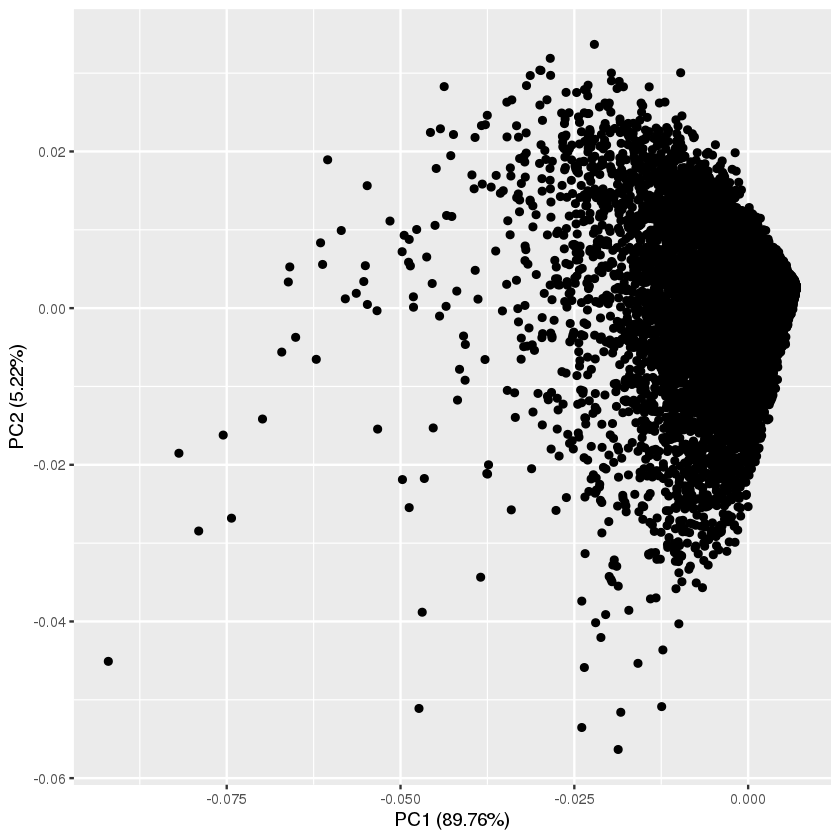

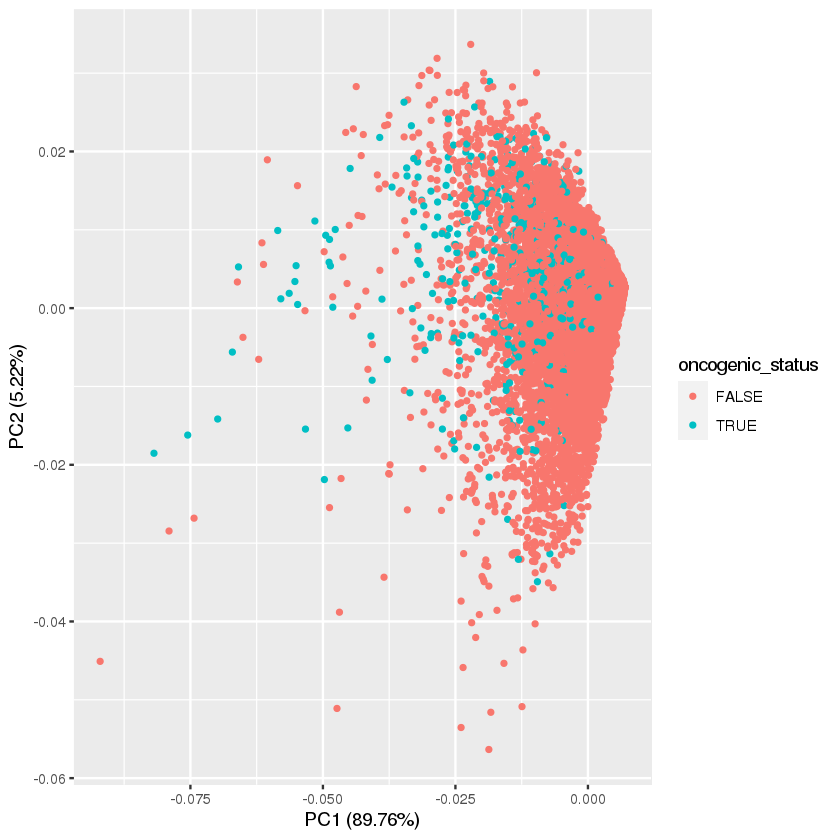

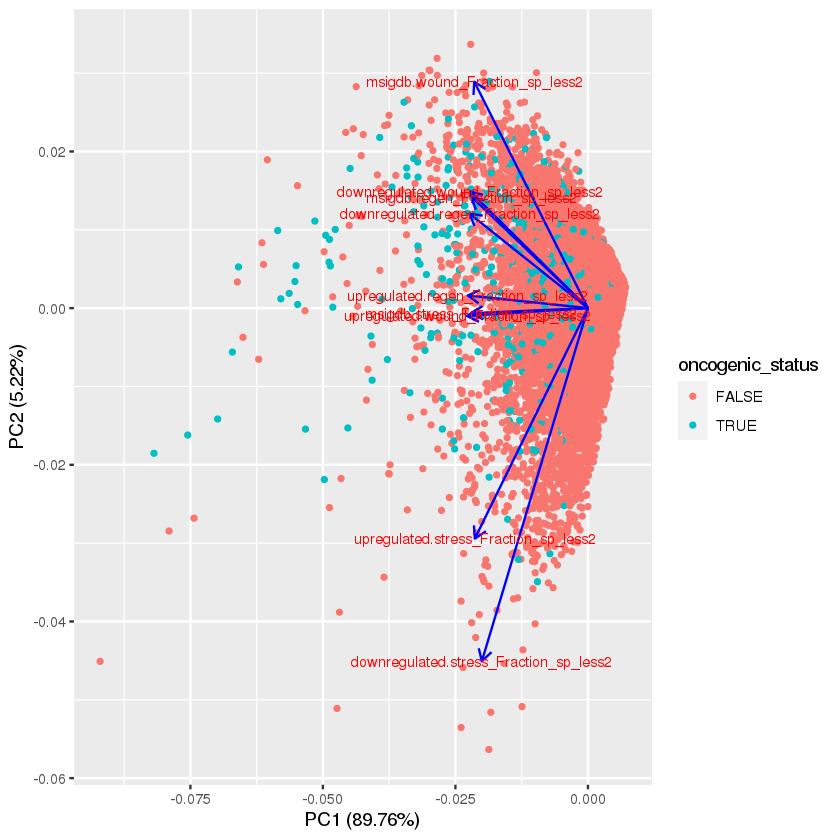

In [11]:
scale_exp <- fractions_combinedDF_EXP[,..cols]
pca_res_exp <- prcomp(scale_exp, scale. = TRUE)
autoplot(pca_res_exp)
autoplot(pca_res_exp, data = fractions_combinedDF_EXP,
         colour = 'oncogenic_status',
         size = 1)

autoplot(pca_res_exp, data = fractions_combinedDF_EXP, colour = 'oncogenic_status',
         loadings = TRUE, loadings.colour = 'blue',
         loadings.label = TRUE, loadings.label.size = 3,
         size = 1)

# make the dots a little smaller

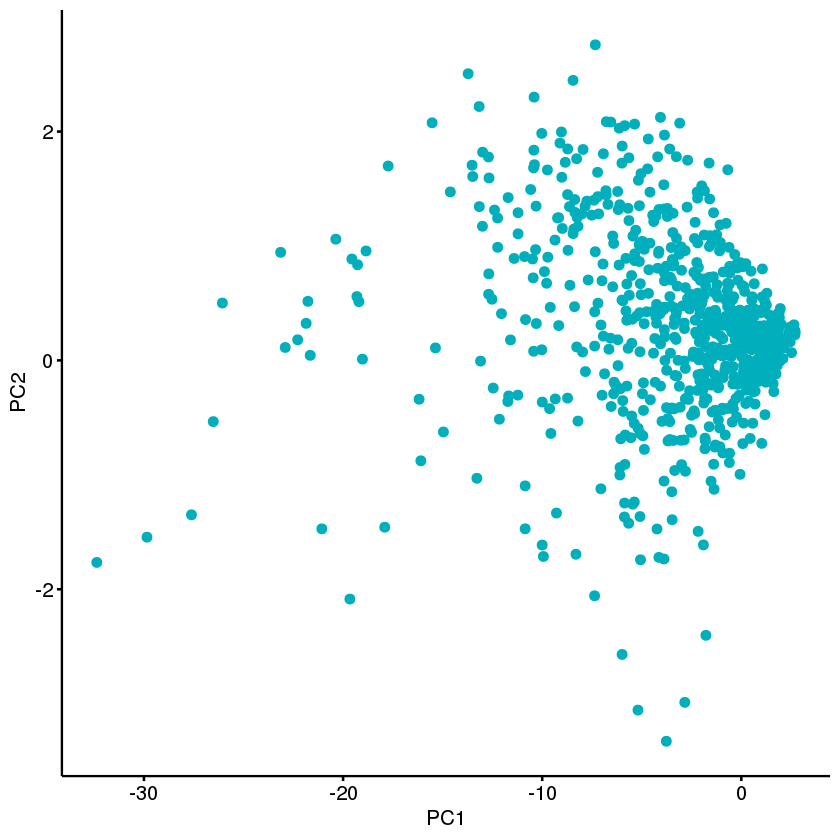

Warning message:
“Removed 3823 rows containing missing values (geom_point).”


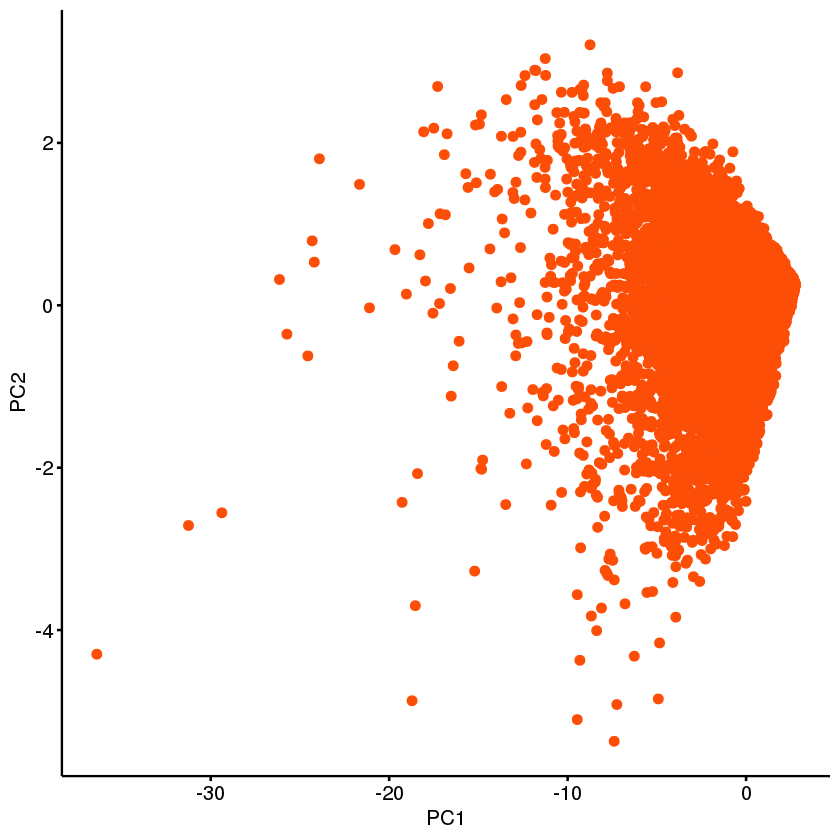

Warning message:
“Removed 369 rows containing missing values (geom_point).”


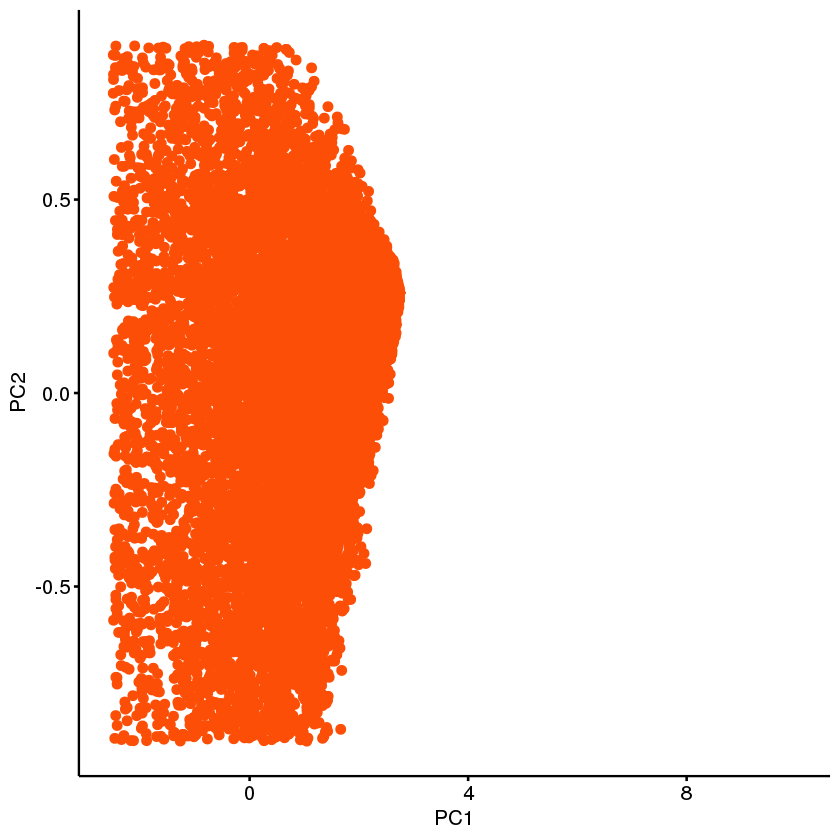

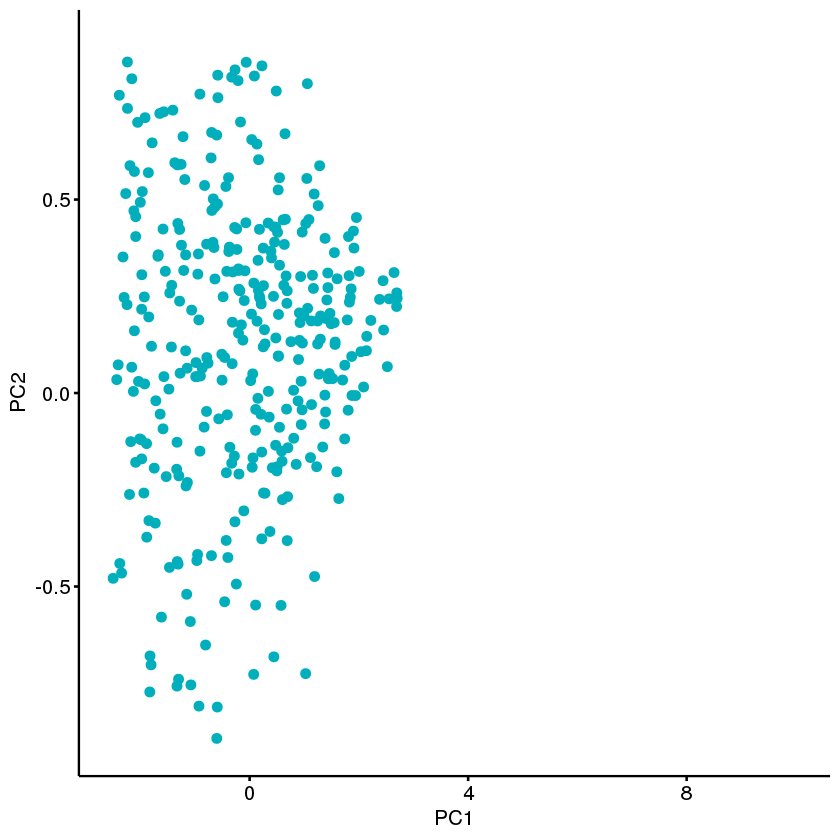

In [12]:
onc_pca_exp <- as.data.frame(pca_res_exp$x)[fractions_combinedDF_EXP$oncogenic_status == "TRUE",]
ggscatter(onc_pca_exp, x = "PC1", y = "PC2",
   color = "#00AFBB")

nononc_pca_exp <- as.data.frame(pca_res_exp$x)[fractions_combinedDF_EXP$oncogenic_status == "FALSE",]
ggscatter(nononc_pca_exp, x = "PC1", y = "PC2",
   color = "#FC4E07")

nononc_pca_exp <- as.data.frame(pca_res_exp$x)[fractions_combinedDF_EXP$oncogenic_status == "FALSE",]
ggscatter(nononc_pca_exp, x = "PC1", y = "PC2",
   color = "#FC4E07")+ ylim(-.9, .9) + xlim(-2.5, 10)

onc_pca_exp <- as.data.frame(pca_res_exp$x)[fractions_combinedDF_EXP$oncogenic_status == "TRUE",]
ggscatter(onc_pca_exp, x = "PC1", y = "PC2",
   color = "#00AFBB")+ ylim(-.9, .9) + xlim(-2.5, 10)

Using  as id variables



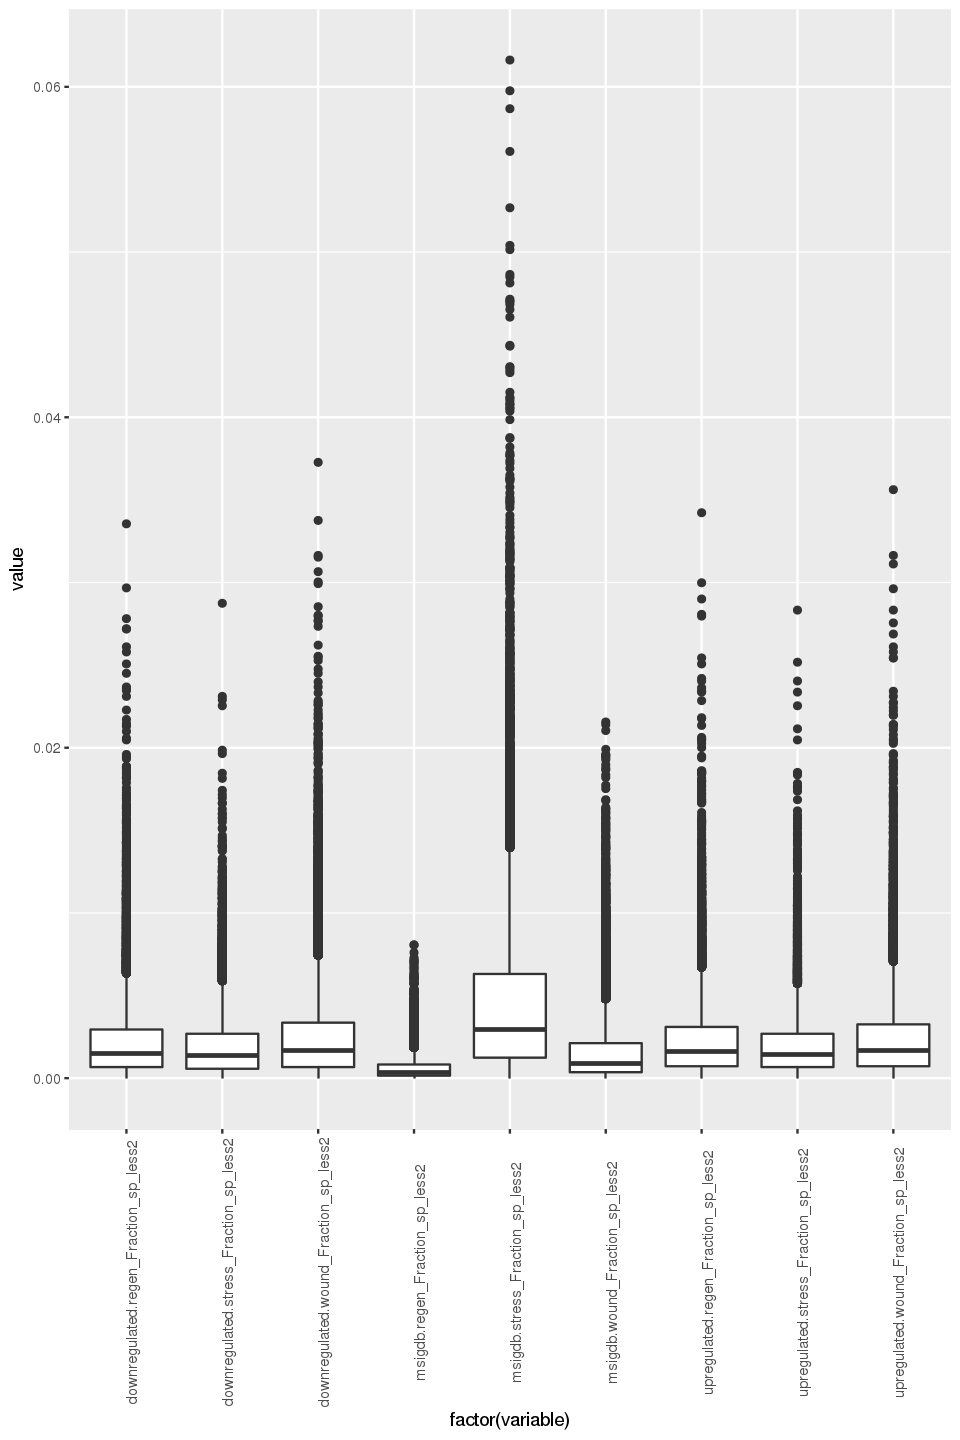

In [13]:
# fractions distributed
options(repr.plot.width=8, repr.plot.height=12)
meltData <- melt(data.frame(scale_exp))
p <- ggplot(meltData, aes(factor(variable), value)) 
p + geom_boxplot() + theme(axis.text.x = element_text(angle = 90))

Using  as id variables

Using  as id variables



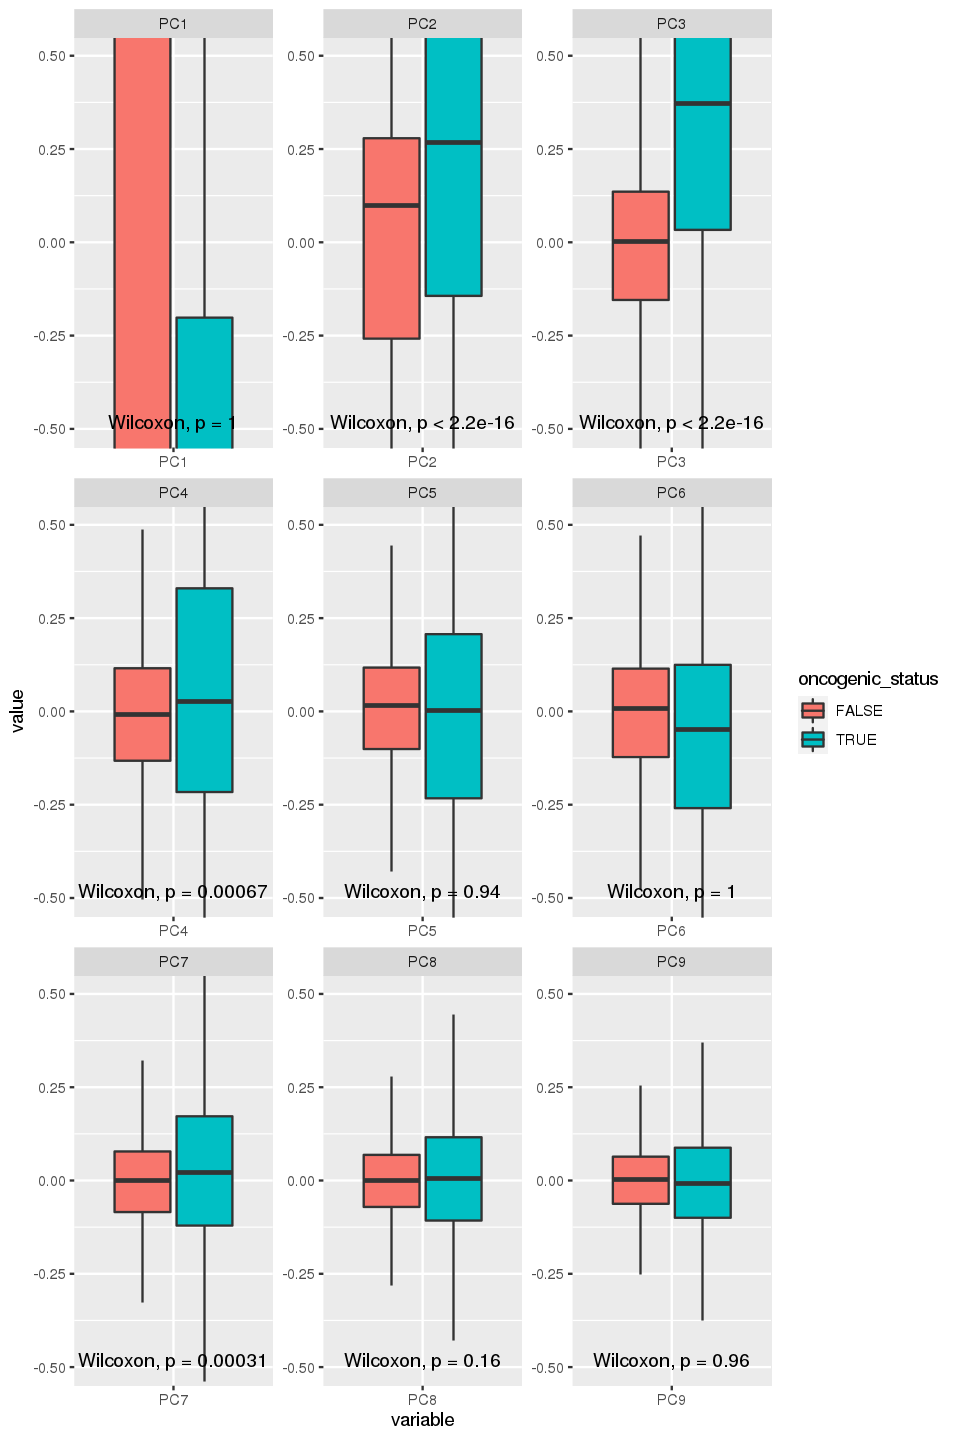

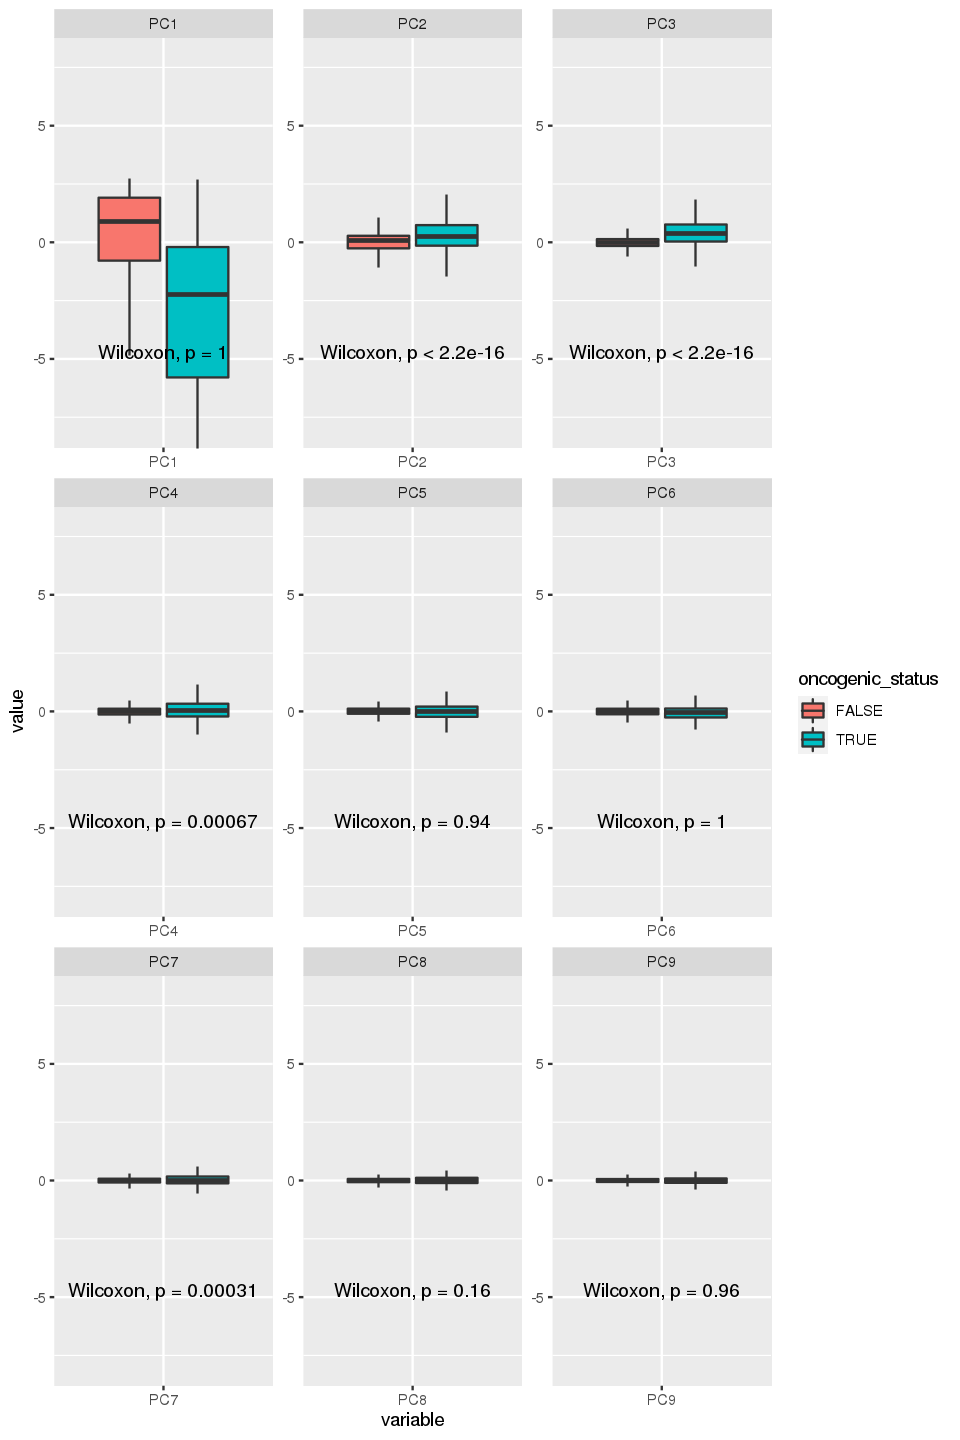

In [14]:
# pca distribution (zoomed in for smaller values)
options(repr.plot.width=8, repr.plot.height=12)
pca_melted_exp4 <- cbind(melt(as.data.frame(pca_res_exp$x)), "oncogenic_status" = rep(fractions_combinedDF_EXP$oncogenic_status, ncol(pca_res_exp$x)))

ggplot(pca_melted_exp4, aes(x=variable, y=value,
                                   fill=oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
coord_cartesian(ylim = c(-.5, .5)) +
stat_compare_means(method.args = list(alternative = "greater"),
                   aes(group = oncogenic_status),
                   label.y = -.5)

# pca distribution (zoomed out for PC1)
pca_melted_exp4 <- cbind(melt(as.data.frame(pca_res_exp$x)), "oncogenic_status" = rep(fractions_combinedDF_EXP$oncogenic_status, ncol(pca_res_exp$x)))

ggplot(pca_melted_exp4, aes(x=variable, y=value,
                                   fill=oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
coord_cartesian(ylim = c(-8, 8)) +
stat_compare_means(method.args = list(alternative = "greater"),
                   aes(group = oncogenic_status),
                   label.y = -5)

Using  as id variables



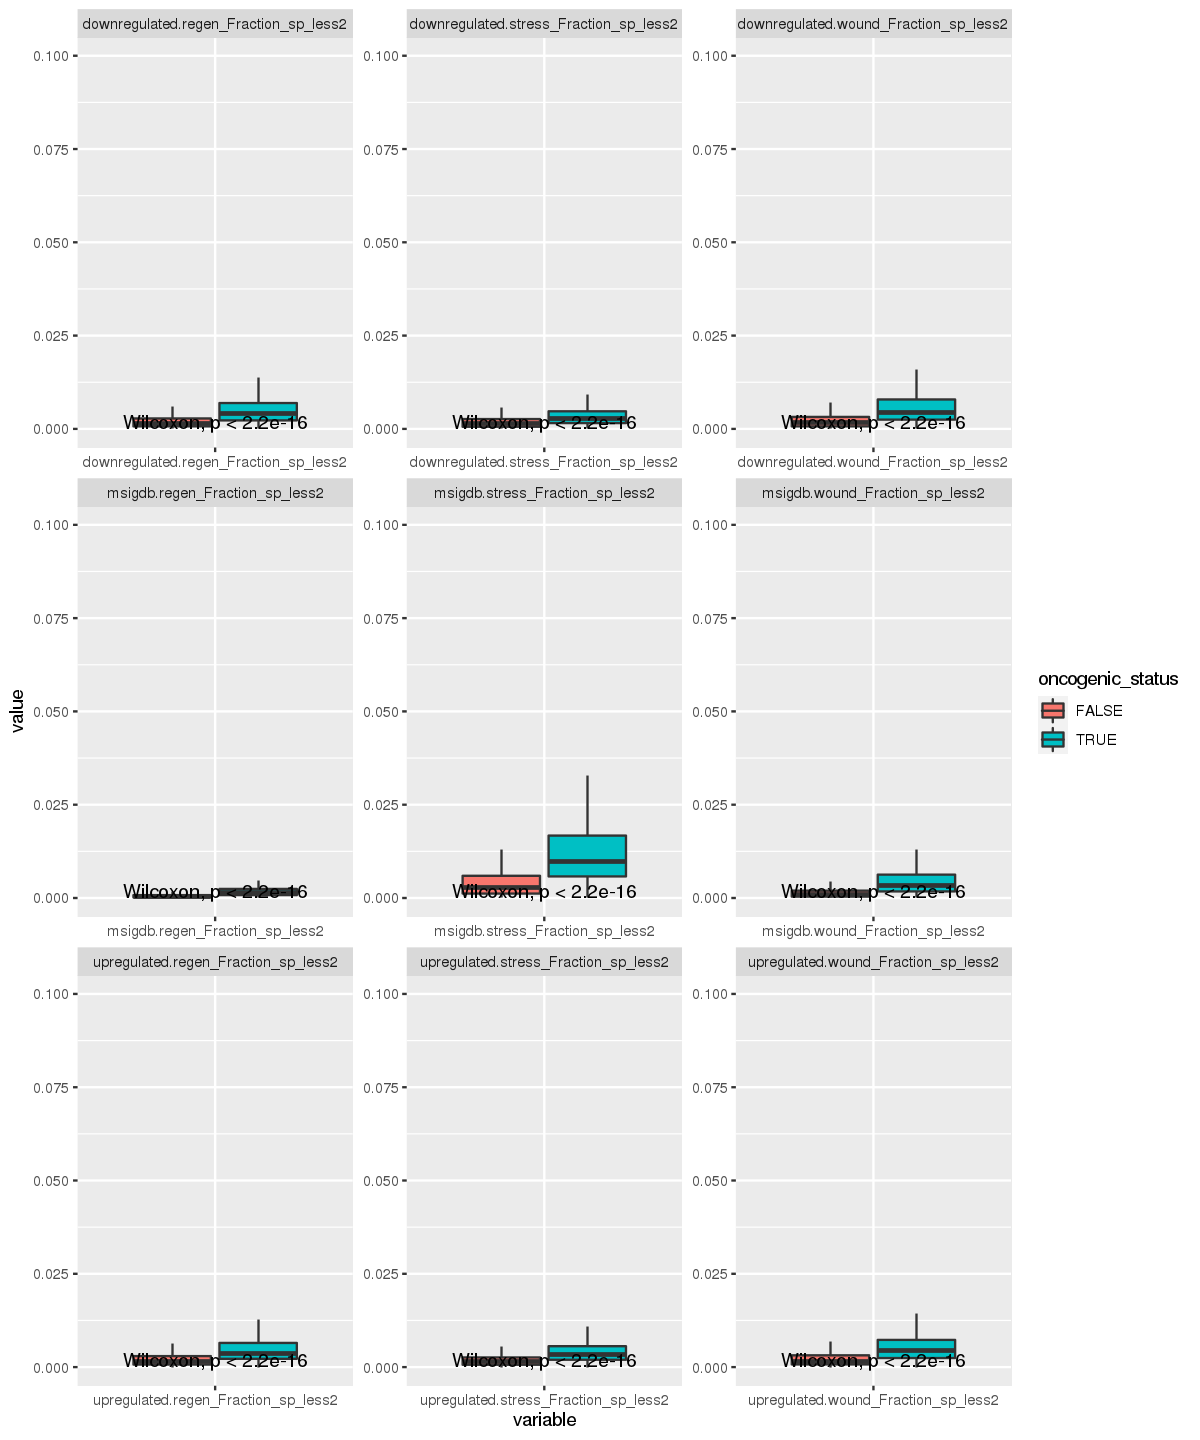

In [15]:
# fractions  distribution  oncogenic vs non (zooed in)
options(repr.plot.width=10, repr.plot.height=12)
pca_melted_exp4_raw <- cbind(melt(data.frame(scale_exp)), "oncogenic_status" = rep(fractions_combinedDF_EXP$oncogenic_status, ncol(scale_exp)))

ggplot(pca_melted_exp4_raw, aes(x=variable, y=value,
                                   fill=oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
coord_cartesian(ylim = c(0, .1)) +
stat_compare_means(method.args = list(alternative = "greater"),
                   aes(group = oncogenic_status),
                   label.y = 0)

Using  as id variables



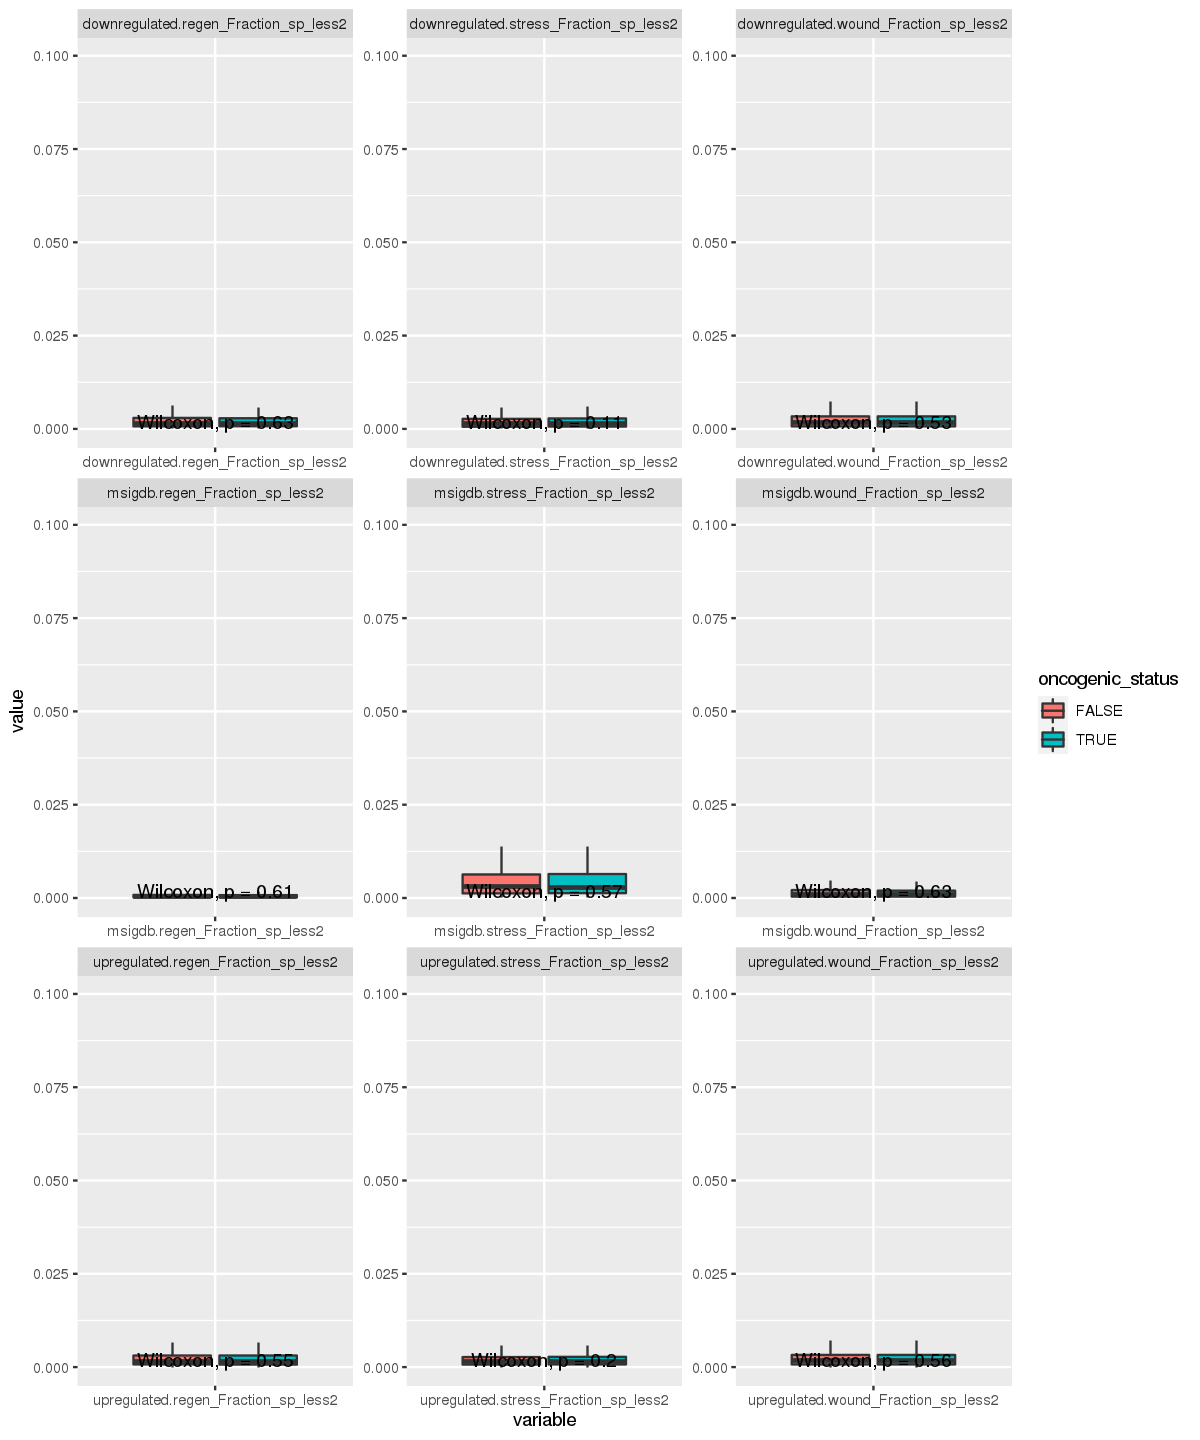

In [16]:
# random test
options(repr.plot.width=10, repr.plot.height=12)
random_pca_melted_exp4_raw <- cbind(melt(data.frame(scale_exp)), "oncogenic_status" = rep(sample(fractions_combinedDF_EXP$oncogenic_status), ncol(scale_exp)))

ggplot(random_pca_melted_exp4_raw, aes(x=variable, y=value,
                                   fill=oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
coord_cartesian(ylim = c(0, .1)) +
stat_compare_means(method.args = list(alternative = "greater"),
                   aes(group = oncogenic_status),
                   label.y = 0)

Using  as id variables



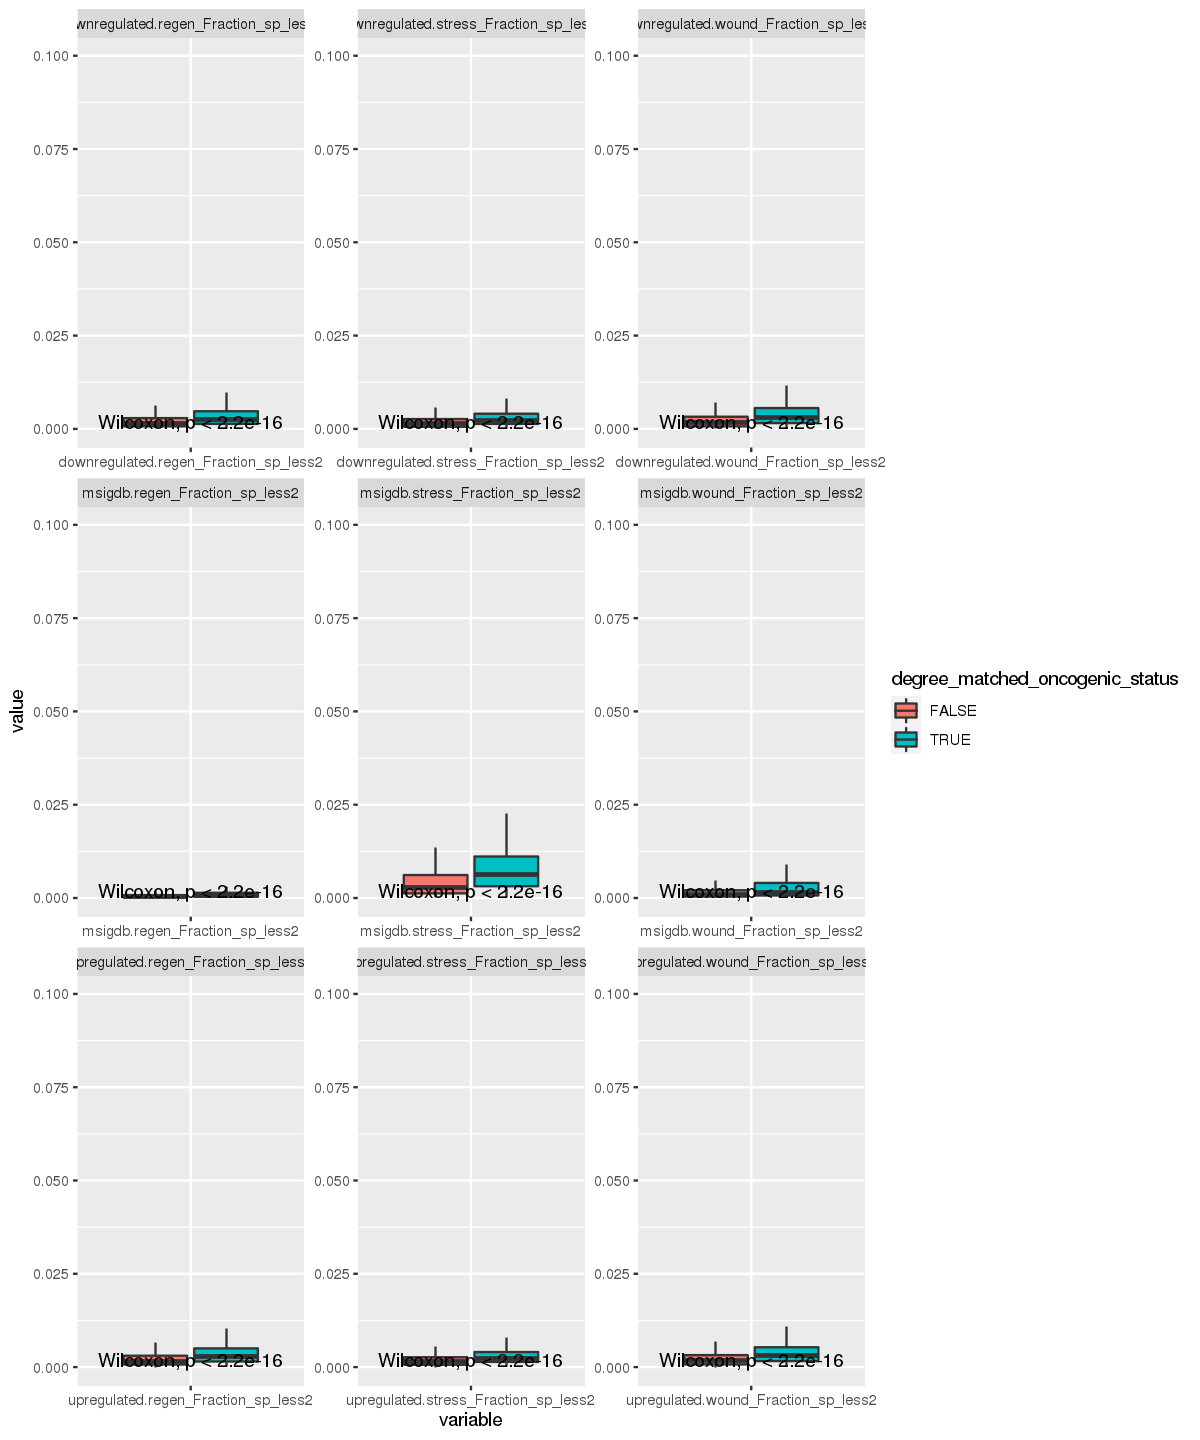

In [17]:
# degree matched
options(repr.plot.width=10, repr.plot.height=12)
degree_matched_pca_melted_exp4_raw <- cbind(melt(data.frame(scale_exp)), "degree_matched_oncogenic_status" = rep(fractions_combinedDF_EXP$degree_matched_oncogenic_status, ncol(scale_exp)))

ggplot(degree_matched_pca_melted_exp4_raw, aes(x=variable, y=value,
                                   fill=degree_matched_oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
coord_cartesian(ylim = c(0, .1)) +
stat_compare_means(aes(group = degree_matched_oncogenic_status),
                   method.args = list(alternative = "greater"),
                   label.y = 0)

Using  as id variables



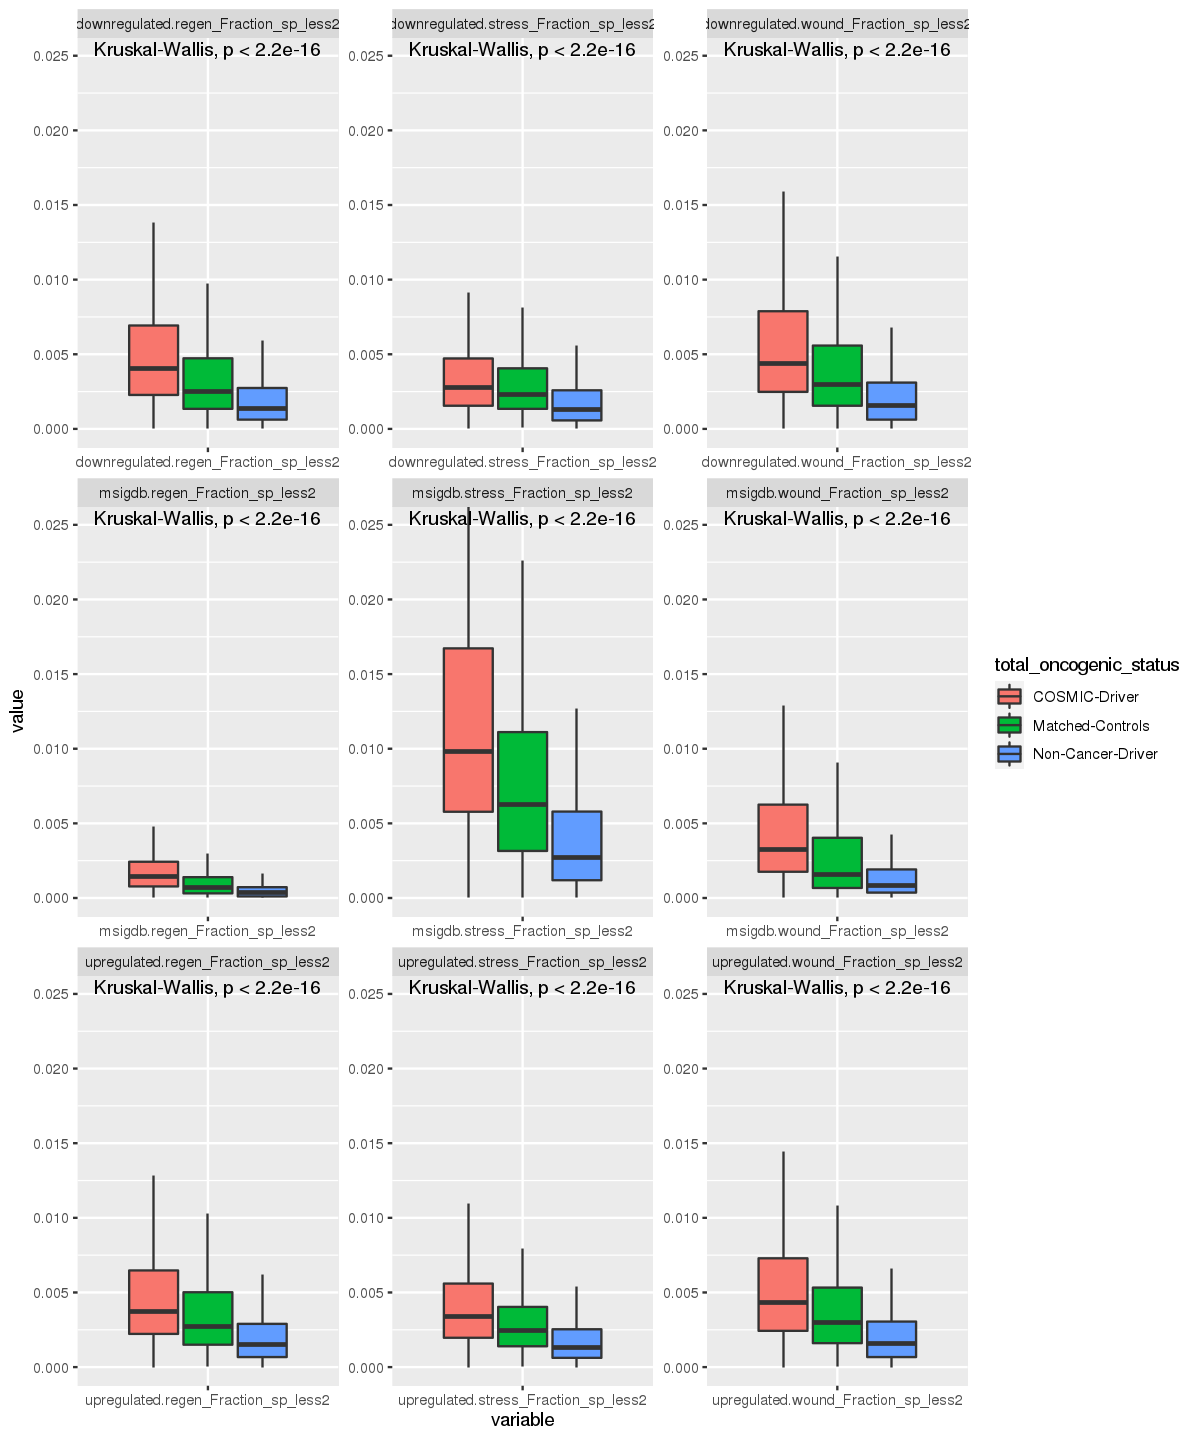

In [18]:
# 3 measures
options(repr.plot.width=10, repr.plot.height=12)
triple_pca_melted_exp4_raw <- cbind(melt(data.frame(scale_exp)), "total_oncogenic_status" = rep(fractions_combinedDF_EXP$total_oncogenic_status, ncol(scale_exp)))

ggplot(triple_pca_melted_exp4_raw, aes(x=variable, y=value,
                                   fill=total_oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
coord_cartesian(ylim = c(0, .025)) +
stat_compare_means(aes(group = total_oncogenic_status),
                   method.args = list(alternative = "greater"),
                   label.y = .025)

In [19]:
library(caTools)
labels <- as.factor(triple_pca_melted_exp4_raw$total_oncogenic_status)
print(table(triple_pca_melted_exp4_raw$total_oncogenic_status))
levels(labels) <- c(1,0,0)
print(table(labels))
total_auroc <- data.frame("fractions" = triple_pca_melted_exp4_raw$value, labels)
colAUC(total_auroc$fractions, total_auroc$labels, plotROC=FALSE, alg=c("Wilcoxon","ROC"))


    COSMIC-Driver  Matched-Controls Non-Cancer-Driver 
             6336              5283            162477 
labels
     1      0 
  6336 167760 


1 vs. 0,0.757769


# Species Experiment Type

 ## PCA < 4

### Upregulated

In [40]:
cols <- colnames(fractions_combinedDF_SPEC_EXP)[grep("up_Fraction_sp_less4",colnames(fractions_combinedDF_SPEC_EXP))]
colnames(fractions_combinedDF_SPEC_EXP[,..cols])

[1] "aandersoni_regen_up_Fraction_sp_less4"      
 [2] "amaculatum_regen_up_Fraction_sp_less4"      
 [3] "amexicanum_regen_up_Fraction_sp_less4"      
 [4] "celegans_stress_up_Fraction_sp_less4"       
 [5] "clupisFamiliaris_wound_up_Fraction_sp_less4"
 [6] "dmelanogaster_stress_up_Fraction_sp_less4"  
 [7] "dmelanogaster_wound_up_Fraction_sp_less4"   
 [8] "drerio_regen_up_Fraction_sp_less4"          
 [9] "ecoli_stress_up_Fraction_sp_less4"          
[10] "mmusculus_stress_up_Fraction_sp_less4"      
[11] "rnorvegicus_wound_up_Fraction_sp_less4"     
[12] "sscrofa_wound_up_Fraction_sp_less4"         
[13] "xlaevis_wound_up_Fraction_sp_less4"         
[14] "xtropicalis_regen_up_Fraction_sp_less4"

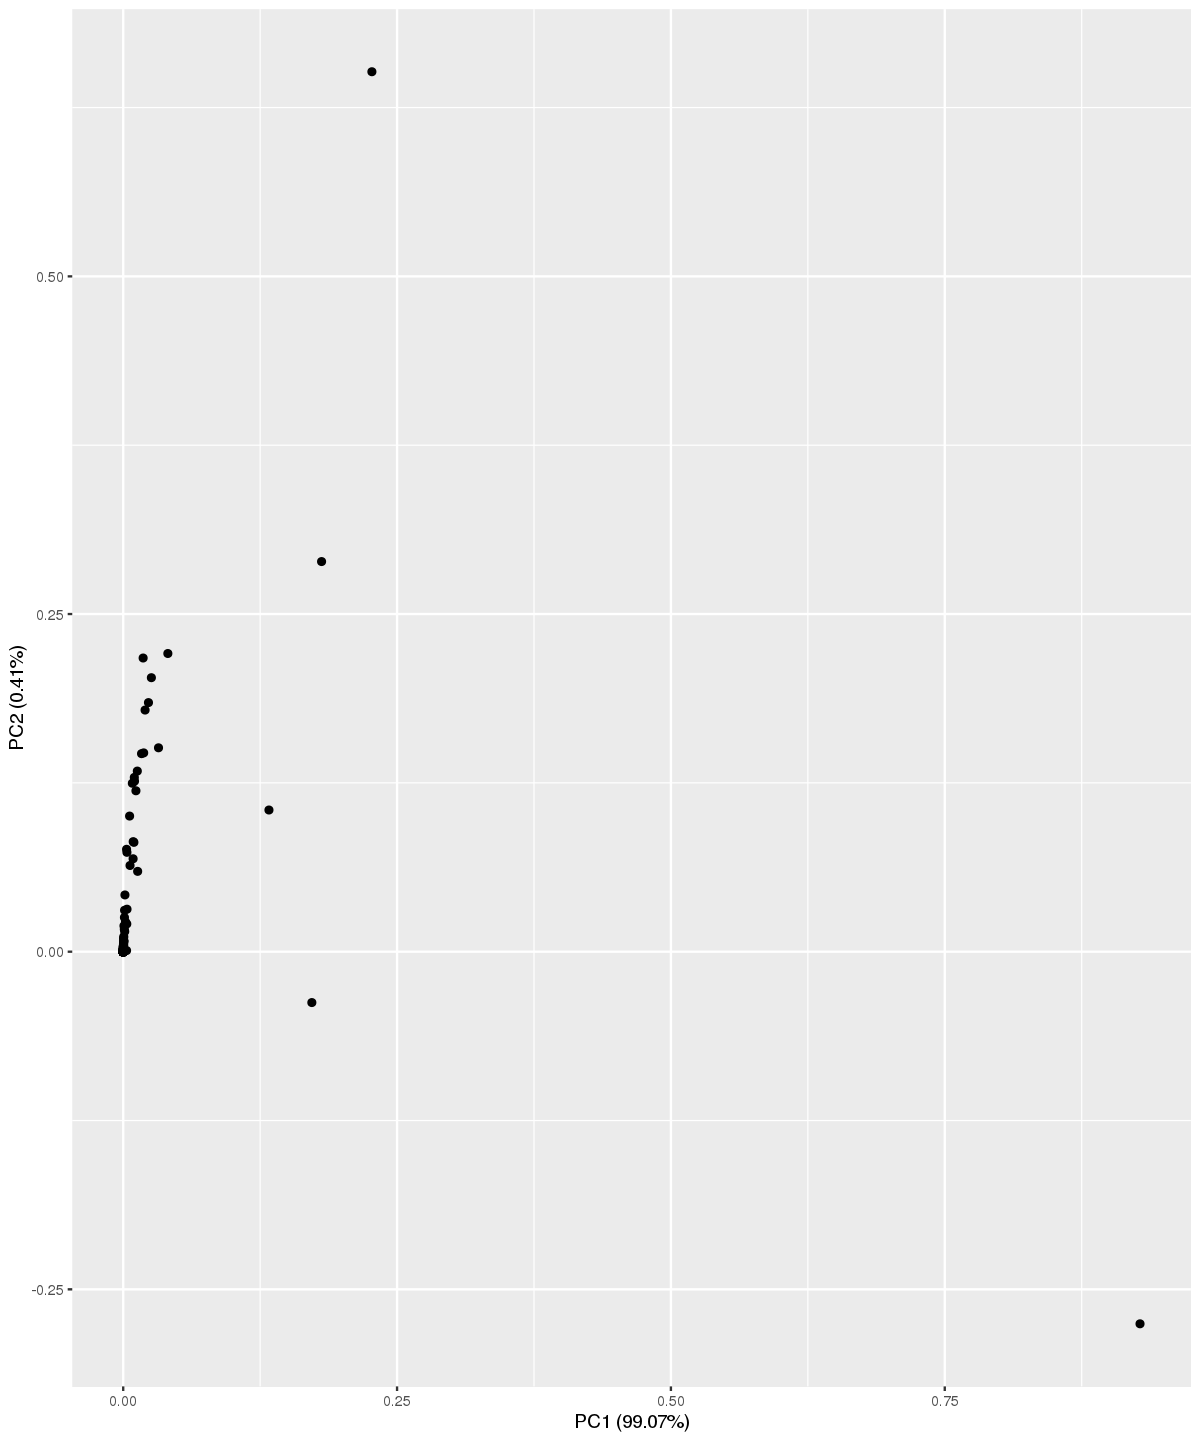

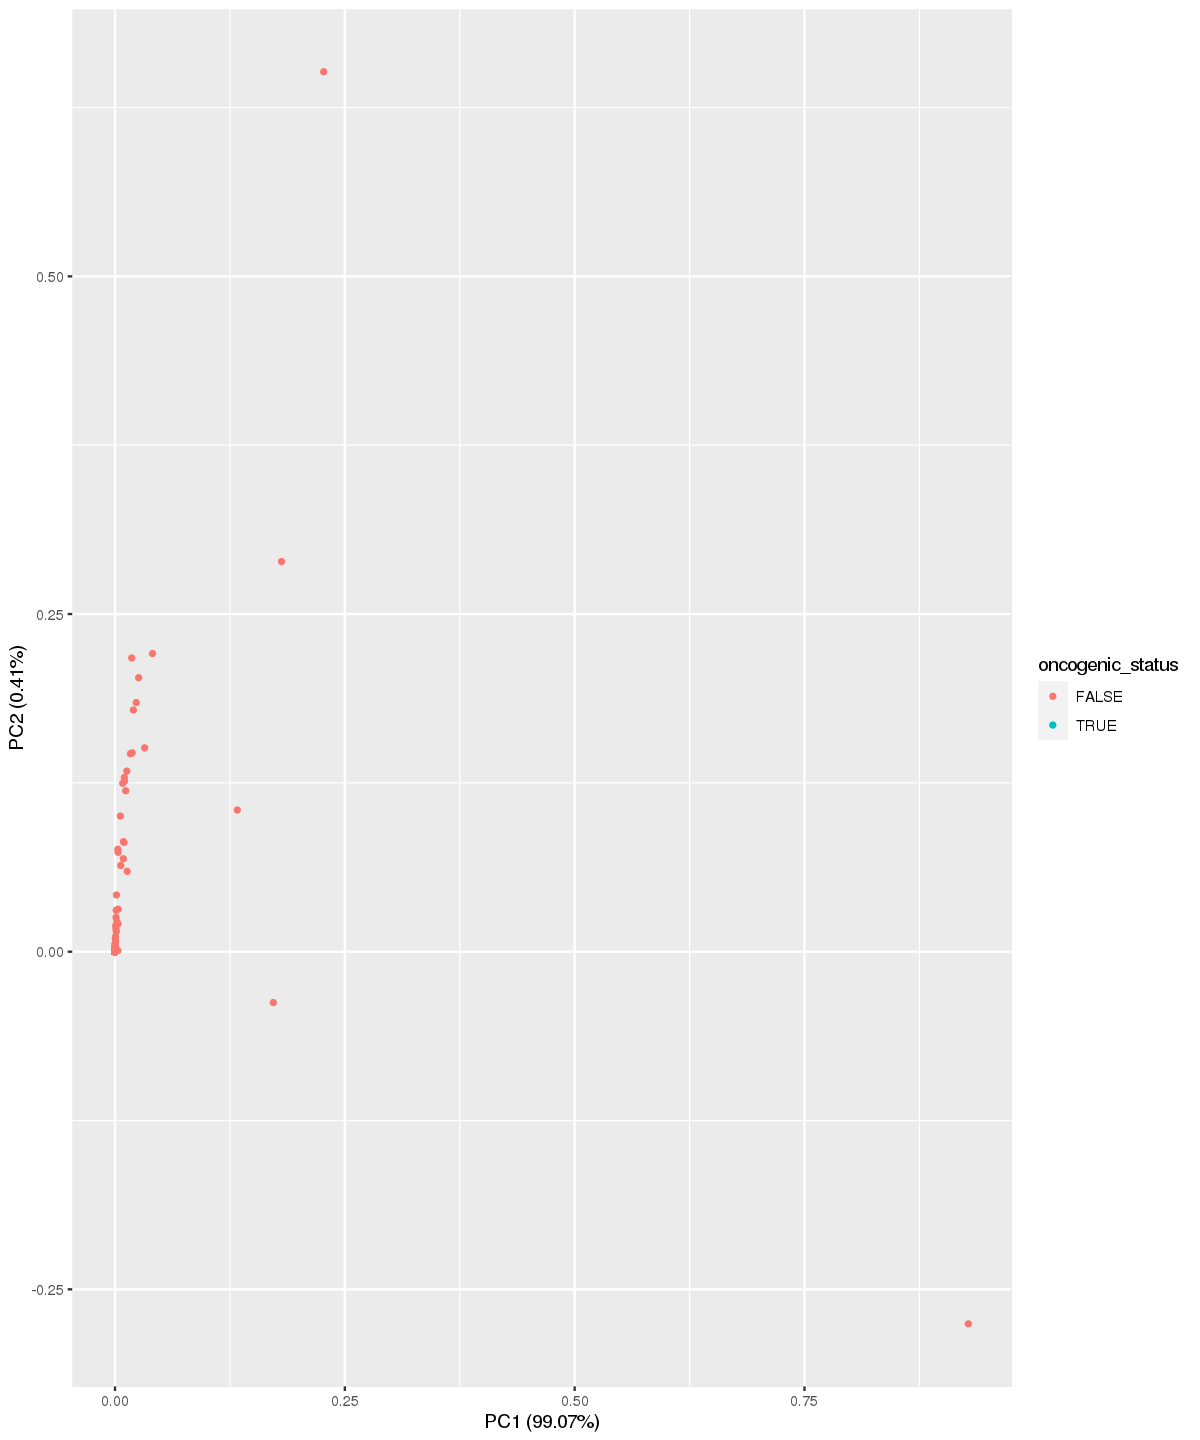

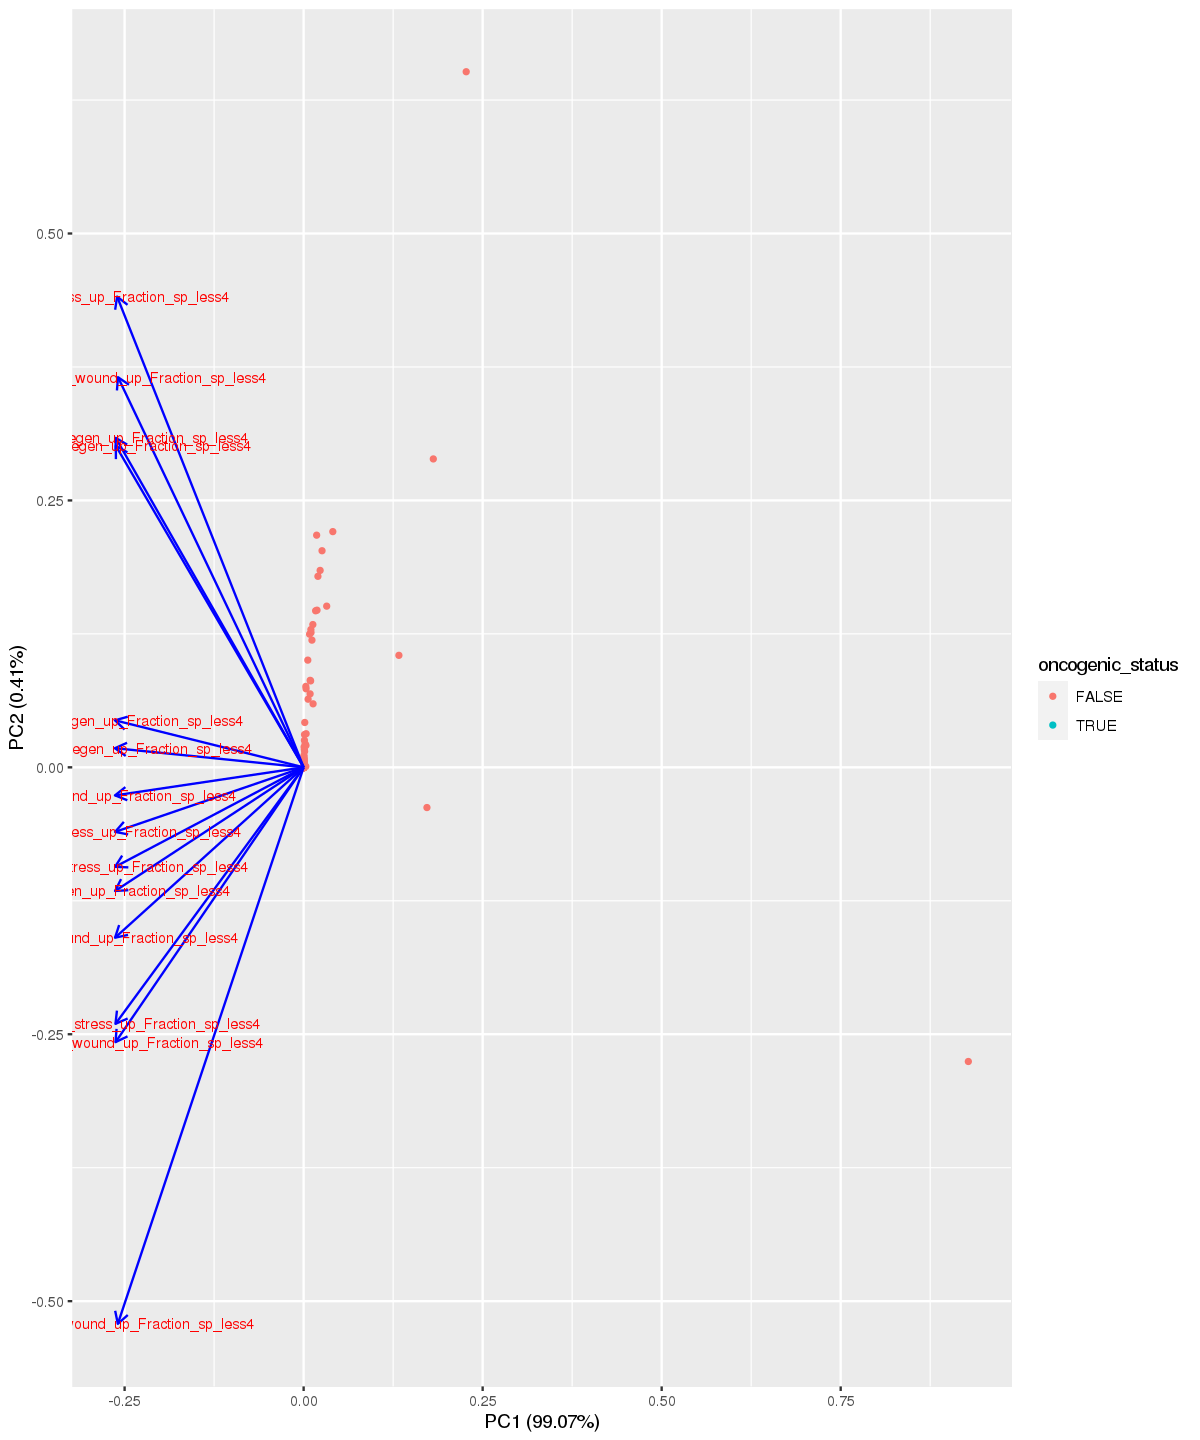

In [41]:
options(repr.plot.width=10, repr.plot.height=12)
scale_spec_exp <- fractions_combinedDF_SPEC_EXP[,..cols]
pca_res_spec_exp <- prcomp(scale_spec_exp, scale. = TRUE)
autoplot(pca_res_spec_exp)
autoplot(pca_res_spec_exp, data = fractions_combinedDF_SPEC_EXP,
         colour = 'oncogenic_status', size = 1)

autoplot(pca_res_spec_exp, data = fractions_combinedDF_SPEC_EXP, colour = 'oncogenic_status',
         loadings = TRUE, loadings.colour = 'blue',
         loadings.label = TRUE, loadings.label.size = 3,
         size = 1)

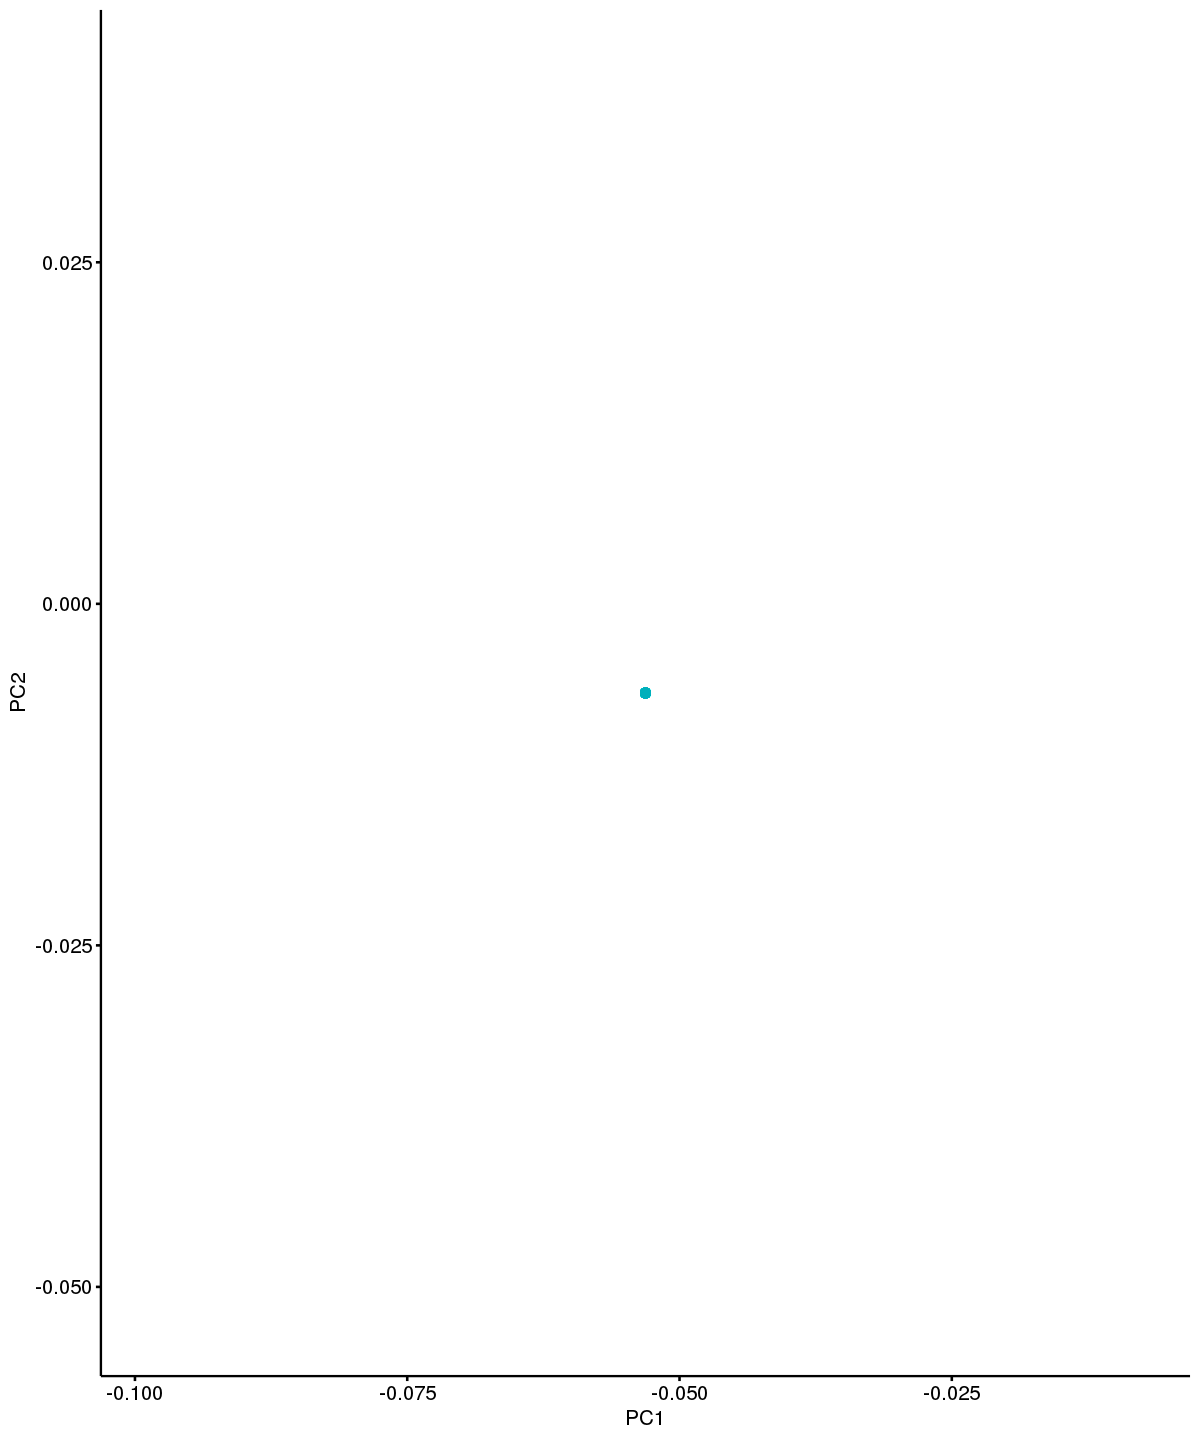

Warning message:
“Removed 29 rows containing missing values (geom_point).”


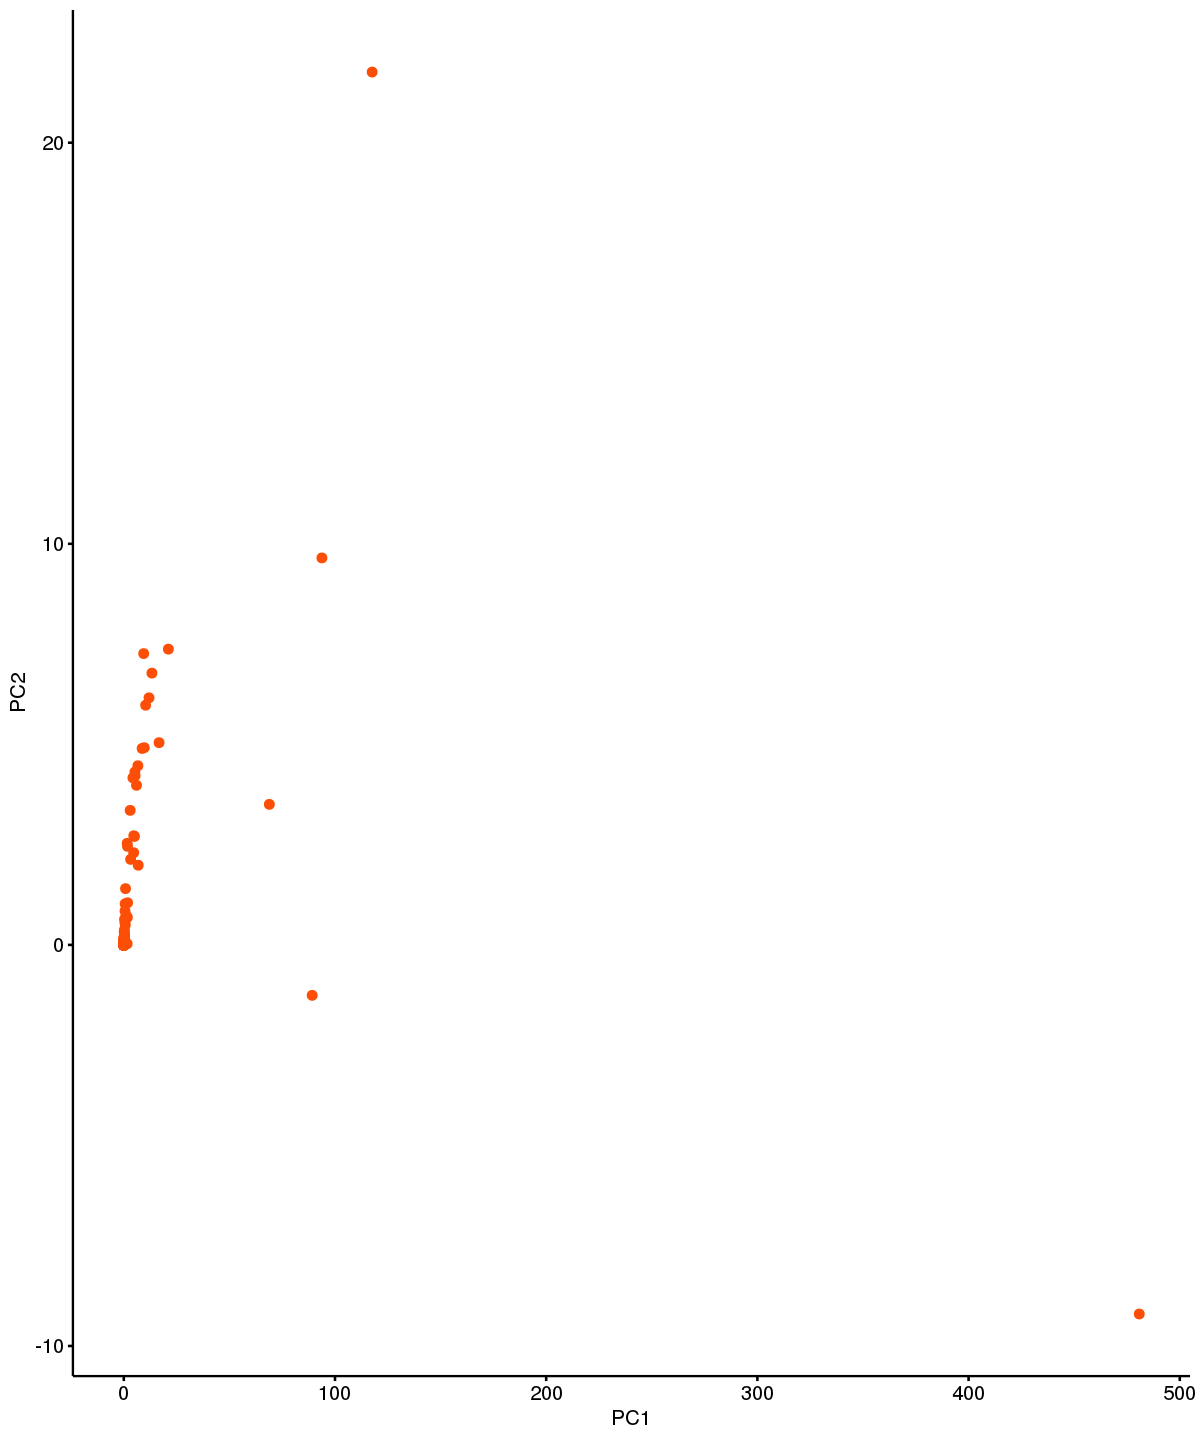

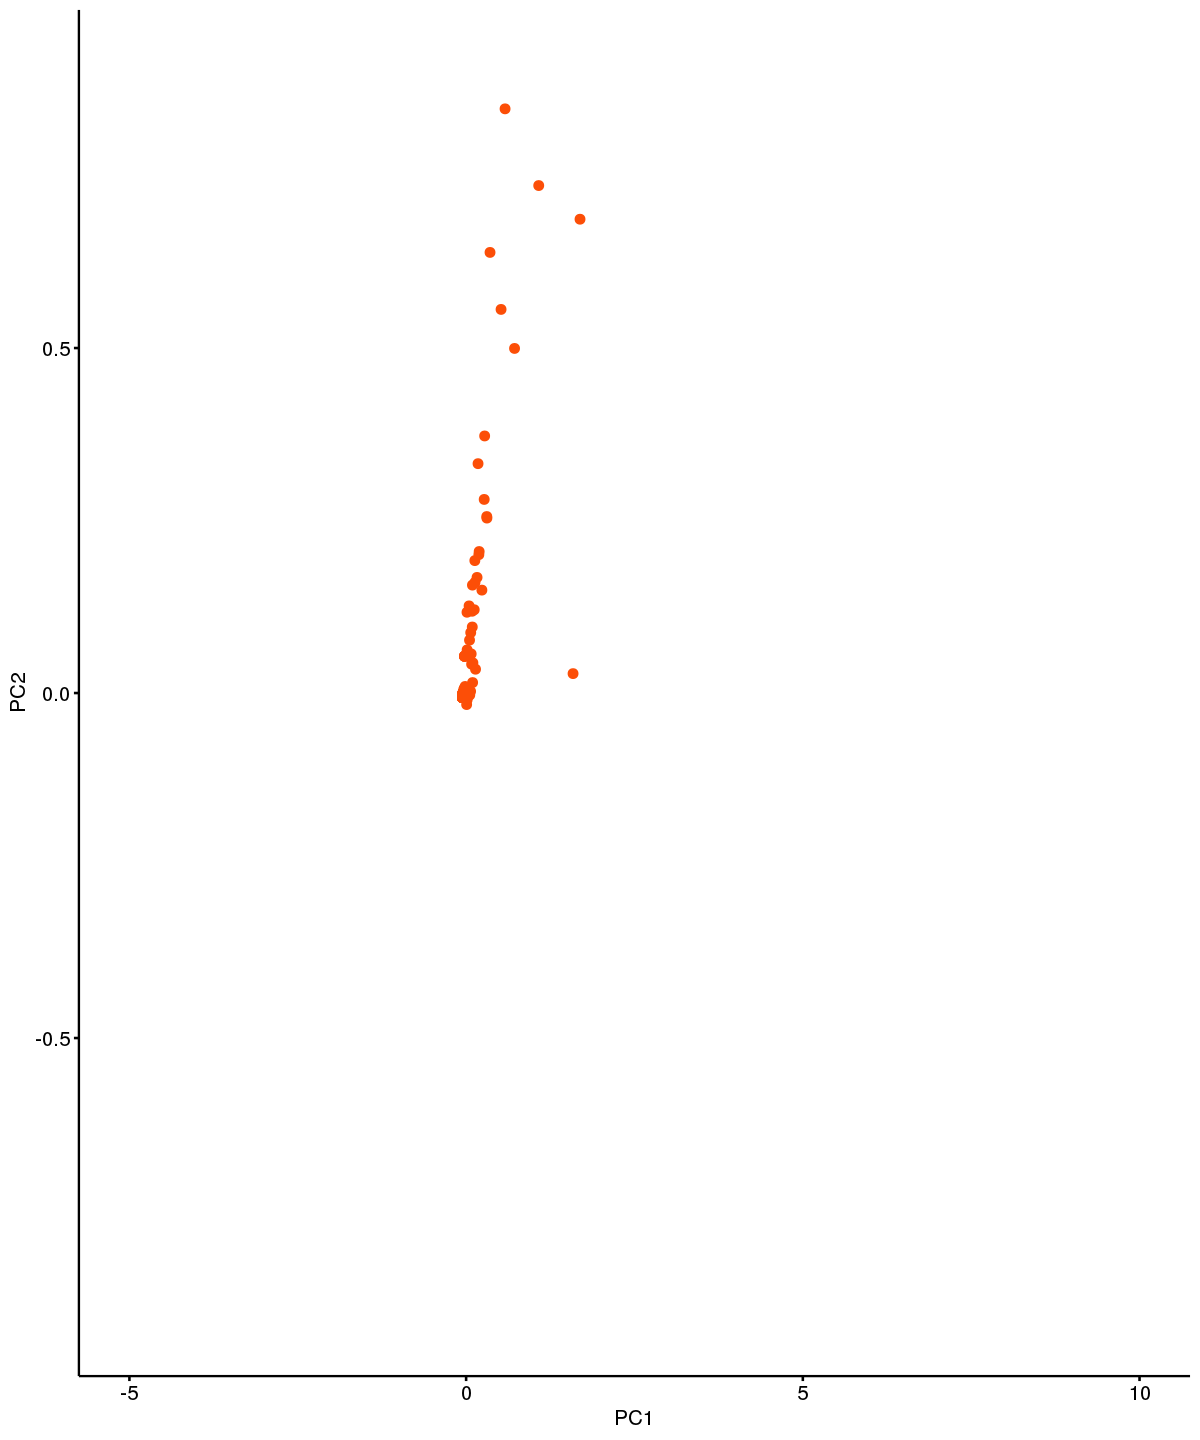

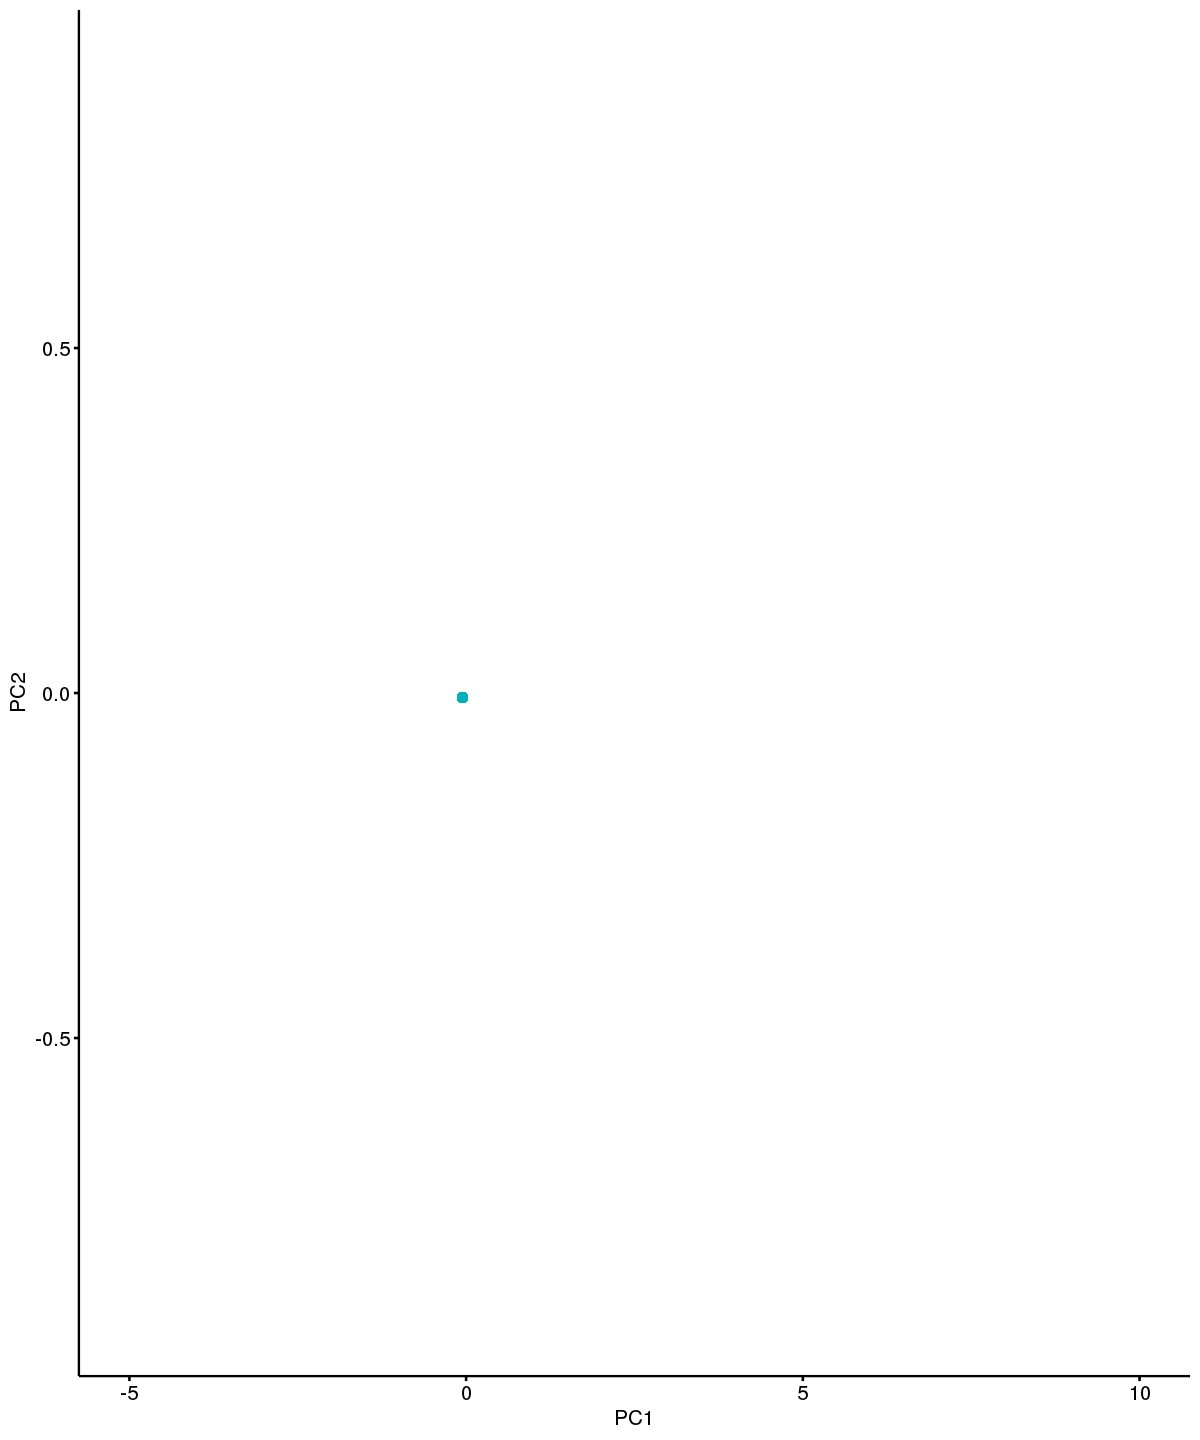

In [42]:
options(repr.plot.width=10, repr.plot.height=12)
onc_pca_spec_exp <- as.data.frame(pca_res_spec_exp$x)[fractions_combinedDF_SPEC_EXP$oncogenic_status == "TRUE",]
ggscatter(onc_pca_spec_exp, x = "PC1", y = "PC2",
   color = "#00AFBB")

nononc_pca_spec_exp <- as.data.frame(pca_res_spec_exp$x)[fractions_combinedDF_SPEC_EXP$oncogenic_status == "FALSE",]
ggscatter(nononc_pca_spec_exp, x = "PC1", y = "PC2",
   color = "#FC4E07")

nononc_pca_spec_exp <- as.data.frame(pca_res_spec_exp$x)[fractions_combinedDF_SPEC_EXP$oncogenic_status == "FALSE",]
ggscatter(nononc_pca_spec_exp, x = "PC1", y = "PC2",
   color = "#FC4E07")+ ylim(-.9, .9) + xlim(-5, 10)

onc_pca_spec_exp <- as.data.frame(pca_res_spec_exp$x)[fractions_combinedDF_SPEC_EXP$oncogenic_status == "TRUE",]
ggscatter(onc_pca_spec_exp, x = "PC1", y = "PC2",
   color = "#00AFBB")+ ylim(-.9, .9) + xlim(-5, 10)

Using  as id variables



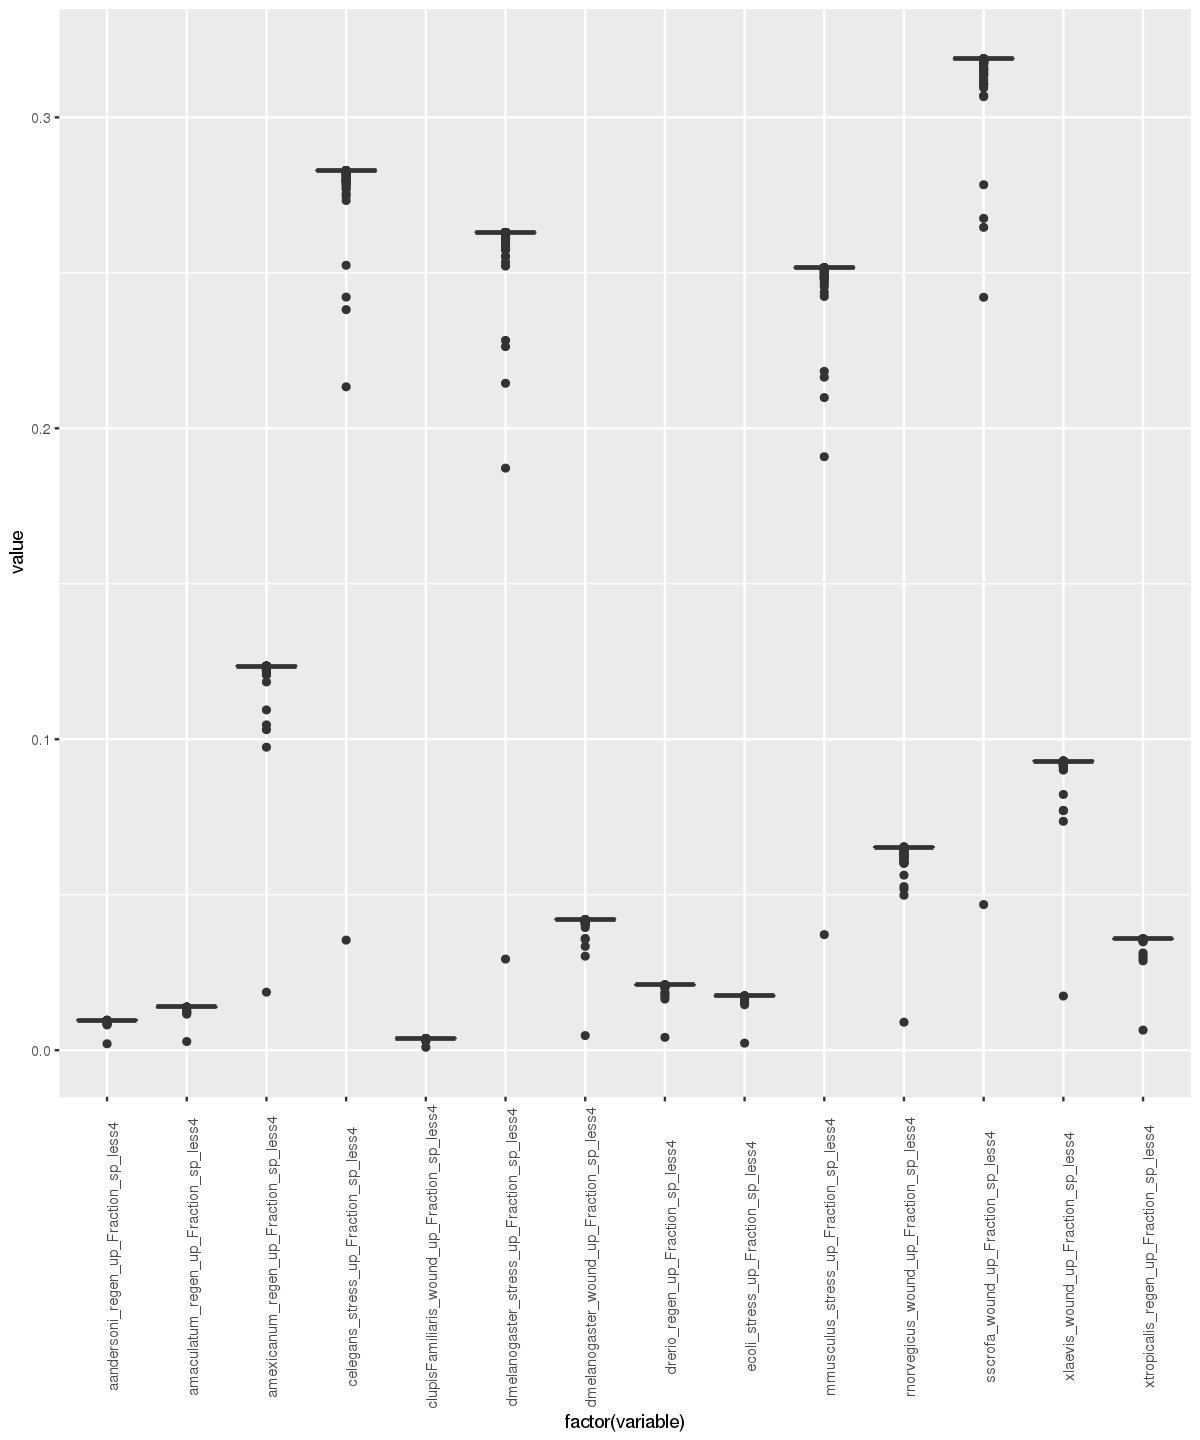

In [43]:
# fractions distributed
options(repr.plot.width=10, repr.plot.height=12)
meltData <- melt(data.frame(scale_spec_exp))
p <- ggplot(meltData, aes(factor(variable), value)) 
p + geom_boxplot() + theme(axis.text.x = element_text(angle = 90))

Using  as id variables



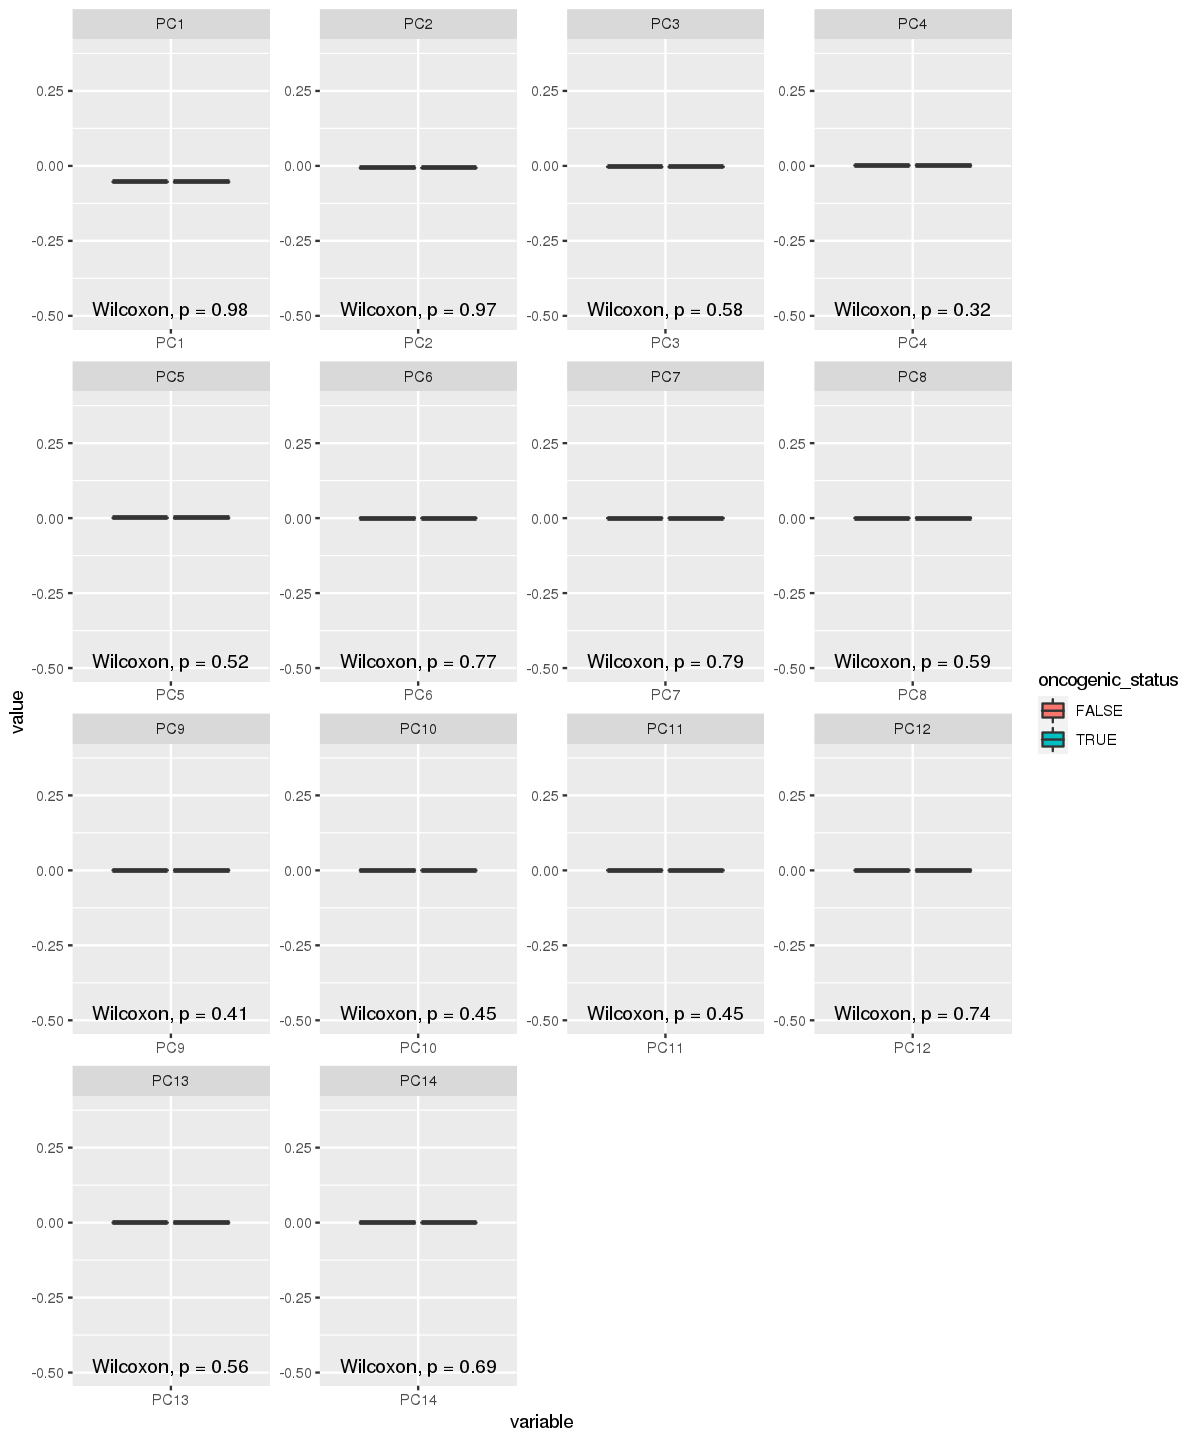

In [45]:
# pcca distribution
options(repr.plot.width=10, repr.plot.height=12)
pca_melted_up4 <- cbind(melt(as.data.frame(pca_res_spec_exp$x)), "oncogenic_status" = rep(fractions_combinedDF_SPEC_EXP$oncogenic_status, ncol(pca_res_spec_exp$x)))

ggplot(pca_melted_up4, aes(x=variable, y=value,
                                   fill=oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
coord_cartesian(ylim = c(-.5, .38)) +
stat_compare_means(method.args = list(alternative = "greater"),
                   aes(group = oncogenic_status),
                   label.y = -.5)

Using  as id variables



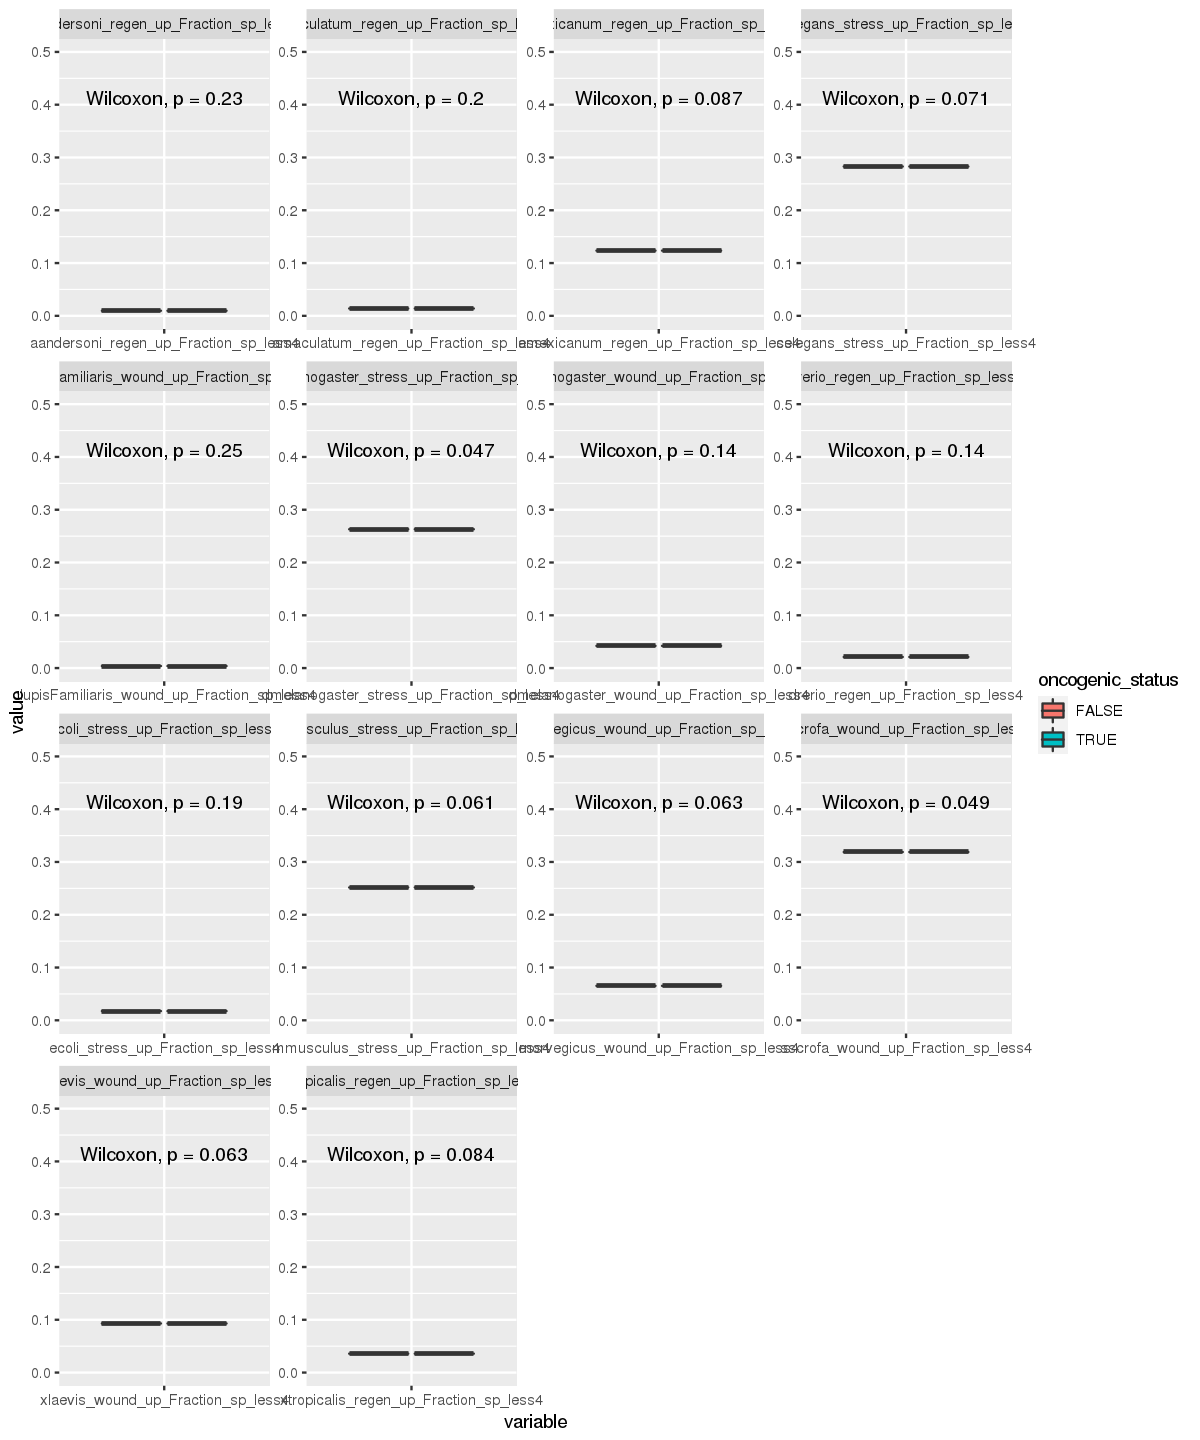

In [46]:
# fractions  distribution  oncogenic vs non
options(repr.plot.width=10, repr.plot.height=12)
pca_melted_exp_up4_raw <- cbind(melt(data.frame(scale_spec_exp)), "oncogenic_status" = rep(fractions_combinedDF_SPEC_EXP$oncogenic_status, ncol(scale_spec_exp)))

ggplot(pca_melted_exp_up4_raw, aes(x=variable, y=value,
                                   fill=oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
coord_cartesian(ylim = c(0, .5)) +
stat_compare_means(method.args = list(alternative = "greater"),
                   aes(group = oncogenic_status),
                   label.y = .4)


Using  as id variables



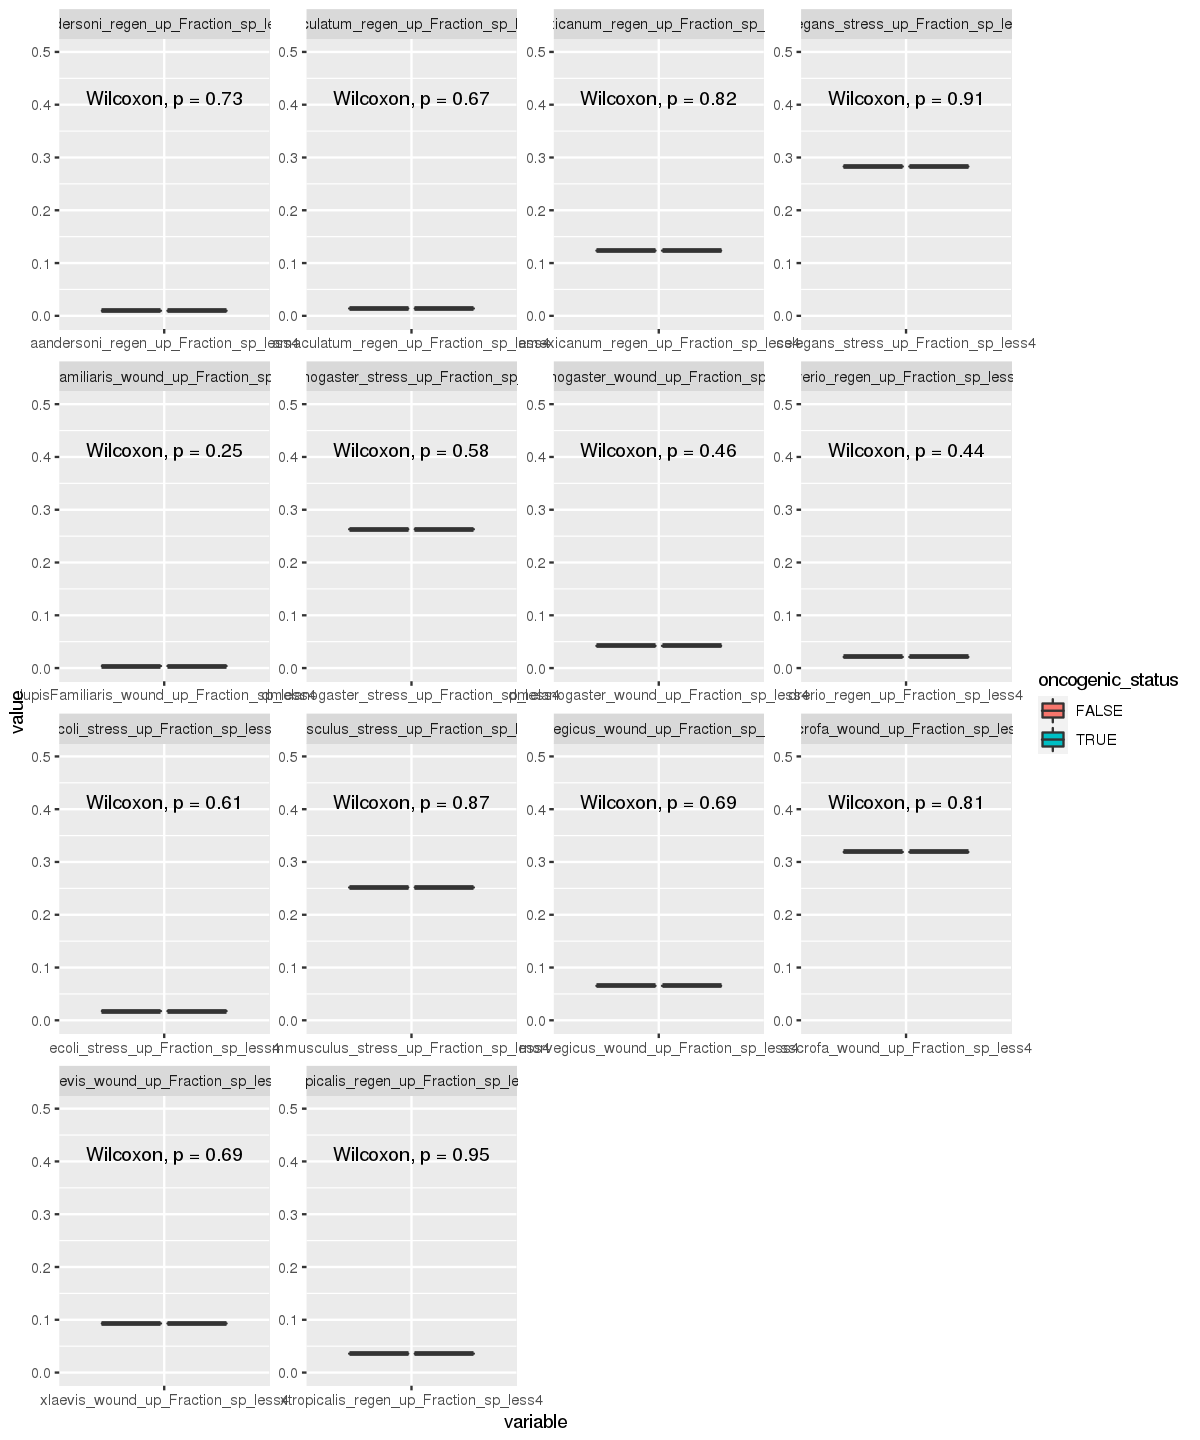

In [47]:
options(repr.plot.width=10, repr.plot.height=12)
random_pca_melted_exp_up4_raw <- cbind(melt(data.frame(scale_spec_exp)), "oncogenic_status" = rep(sample(fractions_combinedDF_SPEC_EXP$oncogenic_status), ncol(scale_spec_exp)))

ggplot(random_pca_melted_exp_up4_raw, aes(x=variable, y=value,
                                   fill=oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
coord_cartesian(ylim = c(0, .5)) +
stat_compare_means(method.args = list(alternative = "greater"),
                   aes(group = oncogenic_status),
                   label.y = .4)

Using  as id variables



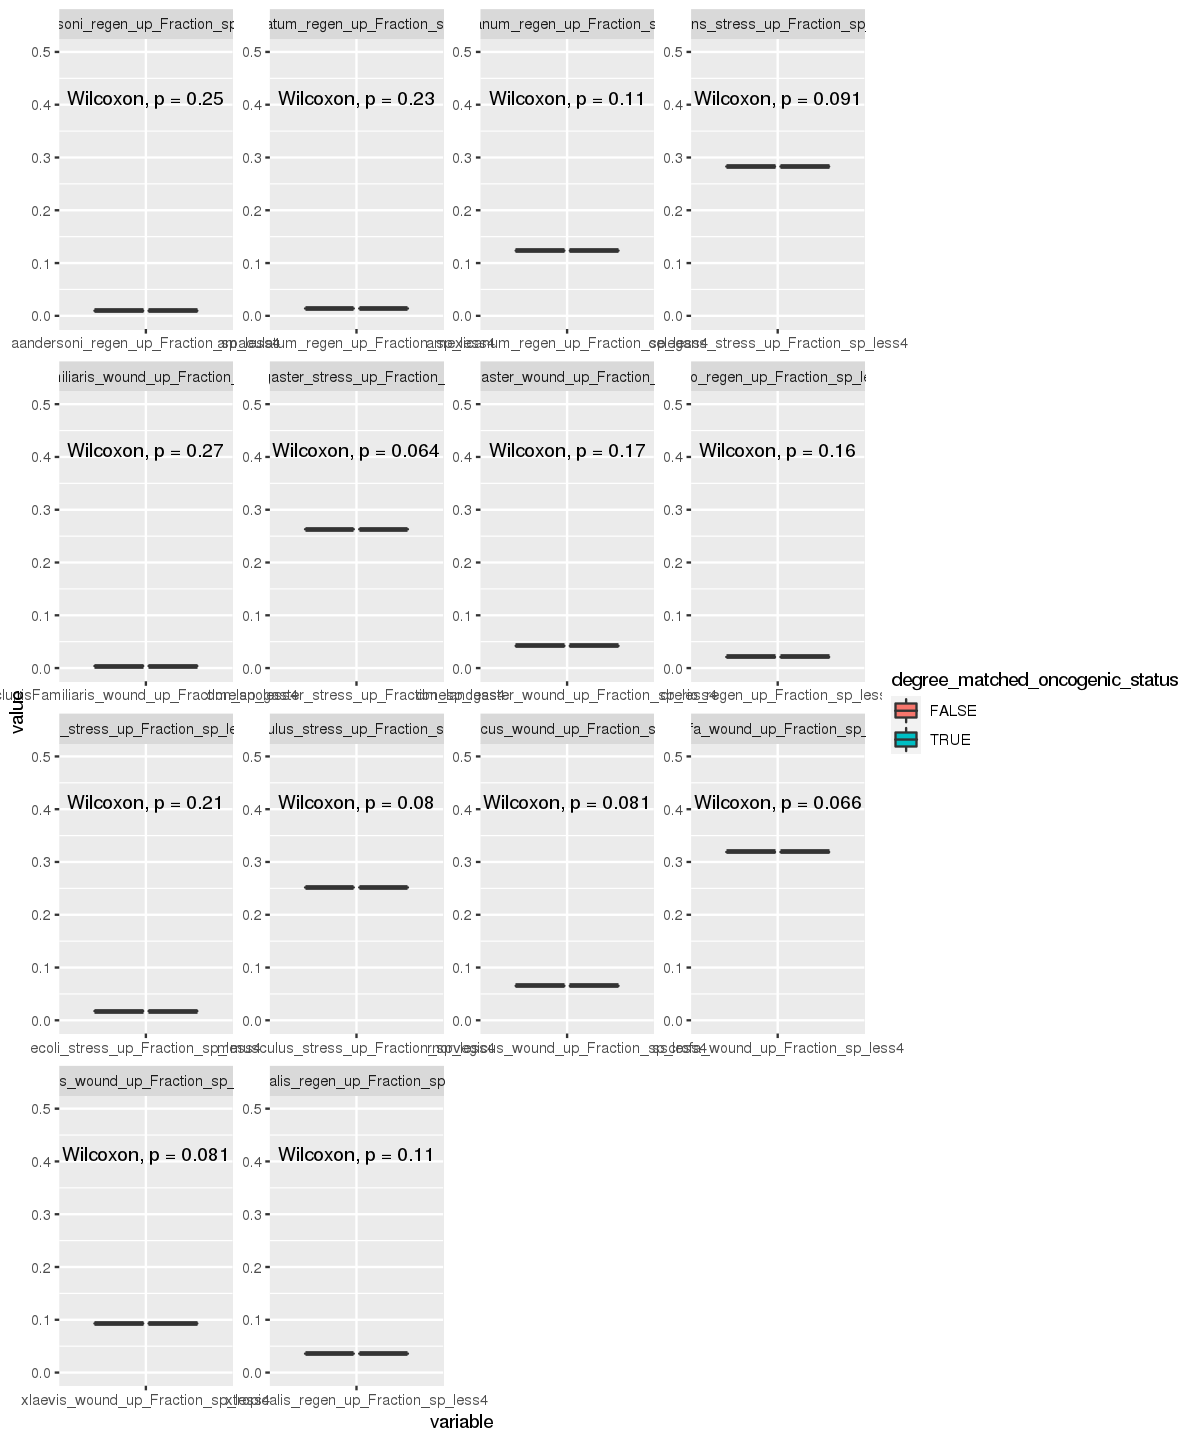

In [48]:
options(repr.plot.width=10, repr.plot.height=12)
degree_matched_pca_melted_exp_up4_raw <- cbind(melt(data.frame(scale_spec_exp)), "degree_matched_oncogenic_status" = rep(fractions_combinedDF_SPEC_EXP$degree_matched_oncogenic_status, ncol(scale_spec_exp)))

ggplot(degree_matched_pca_melted_exp_up4_raw, aes(x=variable, y=value,
                                   fill=degree_matched_oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
coord_cartesian(ylim = c(0, .5)) +
stat_compare_means(method.args = list(alternative = "greater"),
                   aes(group = degree_matched_oncogenic_status),
                   label.y = .4)

Using  as id variables



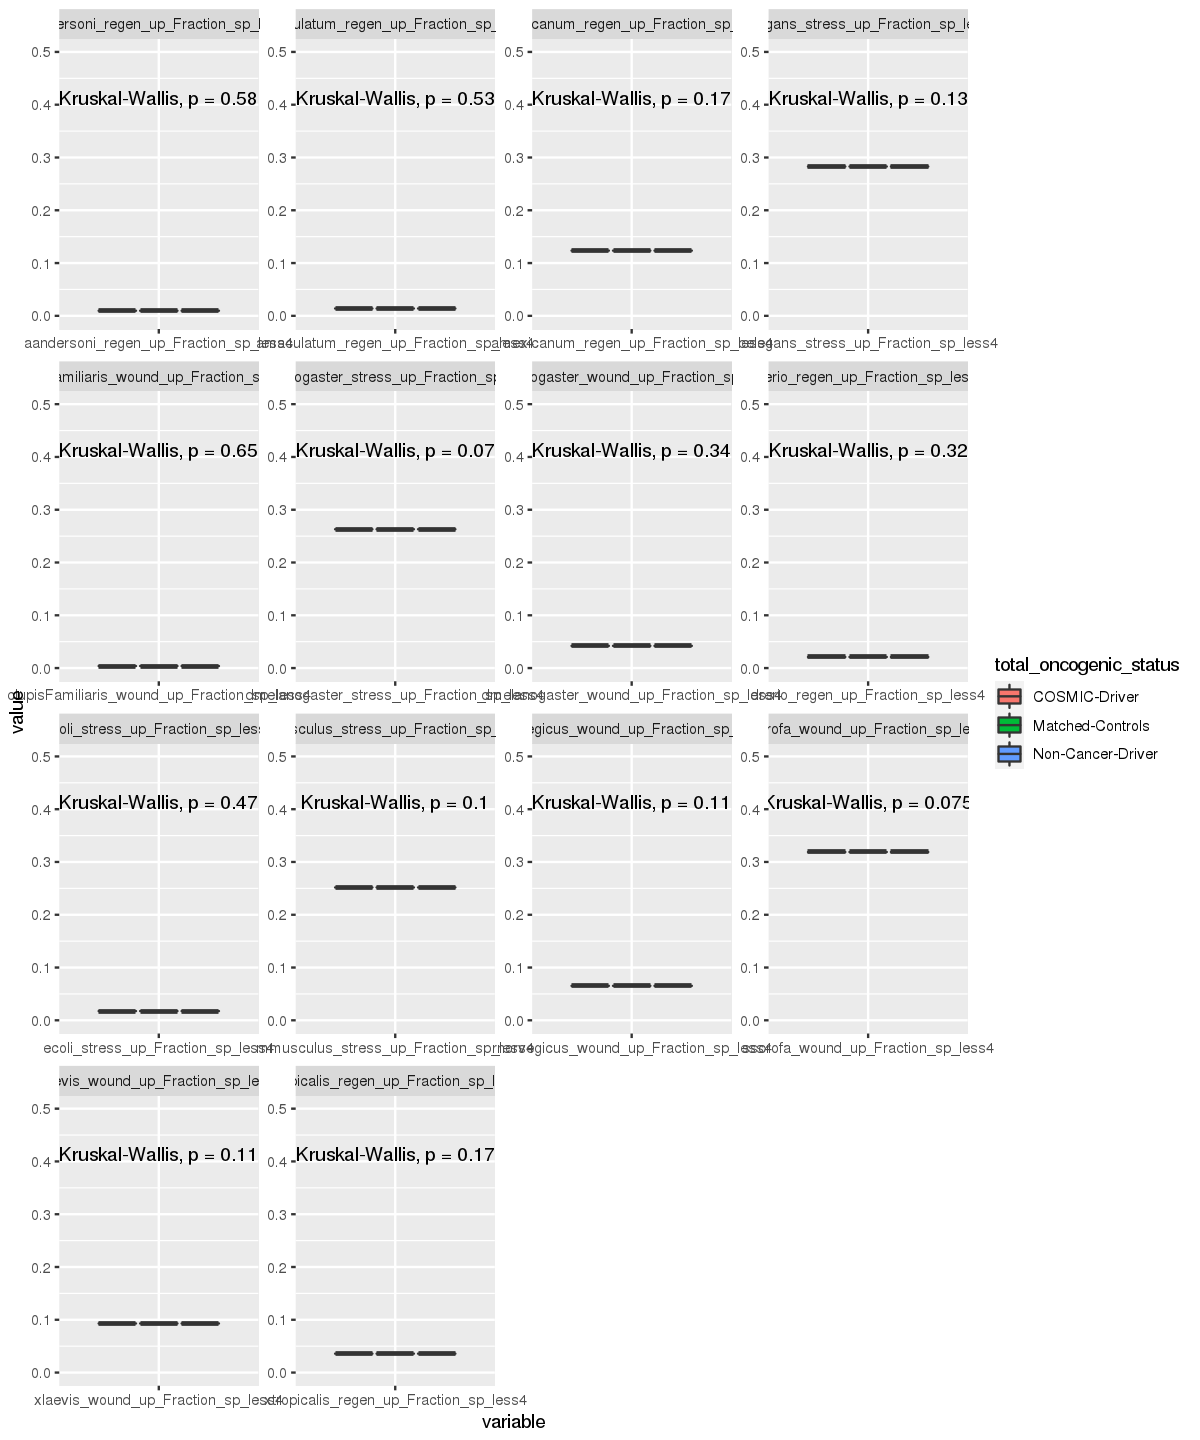

In [49]:
triple_pca_melted_exp_up4_raw <- cbind(melt(data.frame(scale_spec_exp)), "total_oncogenic_status" = rep(fractions_combinedDF_SPEC_EXP$total_oncogenic_status, ncol(scale_spec_exp)))

ggplot(triple_pca_melted_exp_up4_raw, aes(x=variable, y=value,
                                   fill=total_oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
coord_cartesian(ylim = c(0, .5)) +
stat_compare_means(method.args = list(alternative = "greater"),
                   aes(group = total_oncogenic_status),
                   label.y = .4)

### Downregulated

In [29]:
cols <- colnames(fractions_combinedDF_SPEC_EXP)[grep("down_Fraction_sp_less4",colnames(fractions_combinedDF_SPEC_EXP))]
colnames(fractions_combinedDF_SPEC_EXP[,..cols])

[1] "aandersoni_regen_down_Fraction_sp_less4"      
 [2] "amaculatum_regen_down_Fraction_sp_less4"      
 [3] "amexicanum_regen_down_Fraction_sp_less4"      
 [4] "celegans_stress_down_Fraction_sp_less4"       
 [5] "clupisFamiliaris_wound_down_Fraction_sp_less4"
 [6] "dmelanogaster_stress_down_Fraction_sp_less4"  
 [7] "dmelanogaster_wound_down_Fraction_sp_less4"   
 [8] "drerio_regen_down_Fraction_sp_less4"          
 [9] "ecoli_stress_down_Fraction_sp_less4"          
[10] "mmusculus_stress_down_Fraction_sp_less4"      
[11] "rnorvegicus_wound_down_Fraction_sp_less4"     
[12] "sscrofa_wound_down_Fraction_sp_less4"         
[13] "xlaevis_wound_down_Fraction_sp_less4"         
[14] "xtropicalis_regen_down_Fraction_sp_less4"

Warning message:
“Removed 25 rows containing missing values (geom_point).”
Warning message:
“Removed 25 rows containing missing values (geom_point).”


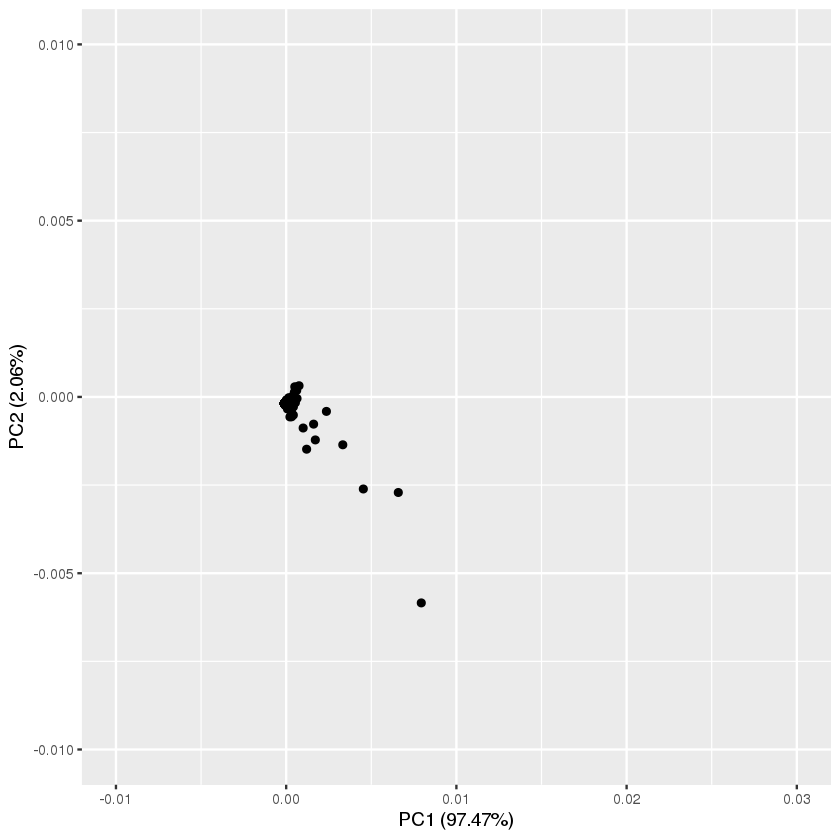

Warning message:
“Removed 25 rows containing missing values (geom_point).”
Warning message:
“Removed 14 rows containing missing values (geom_segment).”
Warning message:
“Removed 14 rows containing missing values (geom_text).”


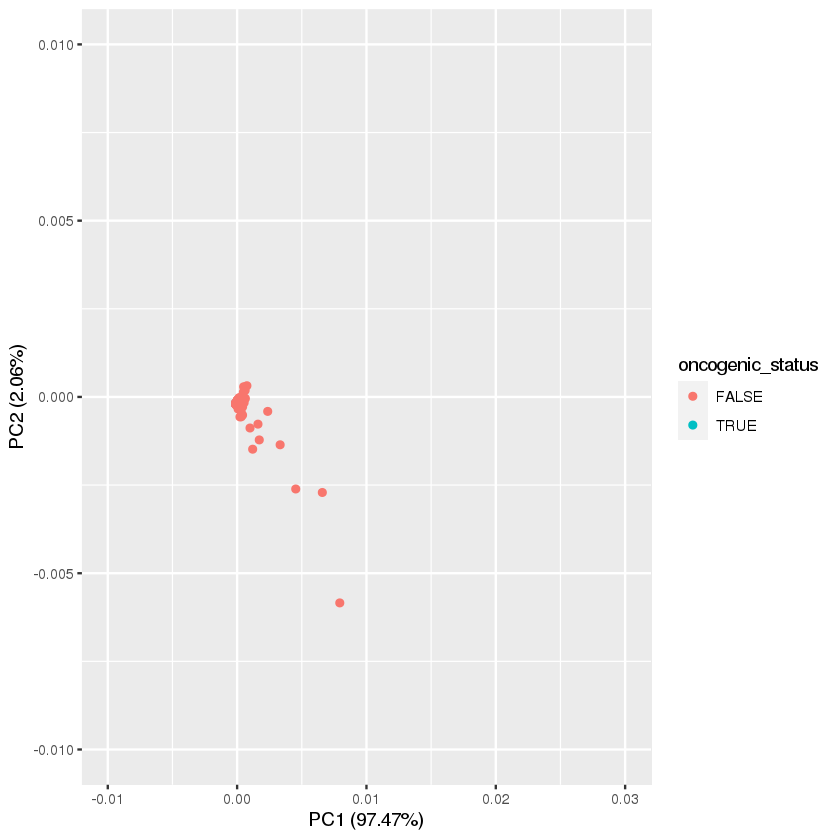

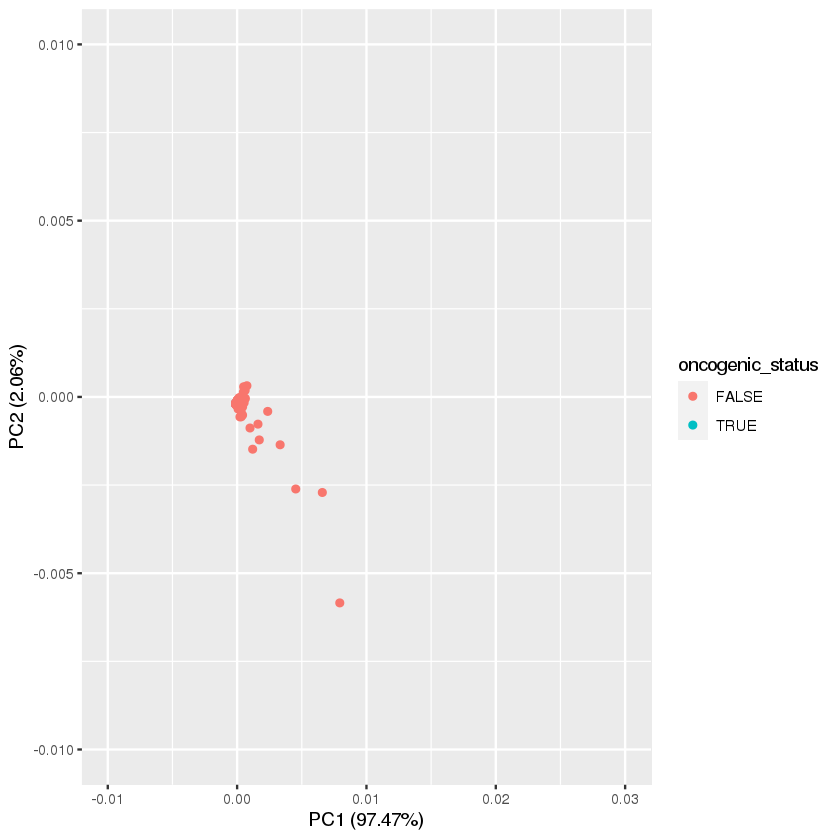

In [30]:
scale_spec_exp_down <- fractions_combinedDF_SPEC_EXP[,..cols]
pca_res_spec_exp_down <- prcomp(scale_spec_exp_down, scale. = TRUE)
autoplot(pca_res_spec_exp_down) + ylim(-.01, .01) + xlim(-.01, .03)
autoplot(pca_res_spec_exp_down, data = fractions_combinedDF_SPEC_EXP, colour = 'oncogenic_status') + ylim(-.01, .01) + xlim(-.01, .03)

autoplot(pca_res_spec_exp_down, data = fractions_combinedDF_SPEC_EXP, colour = 'oncogenic_status',
         loadings = TRUE, loadings.colour = 'blue',
         loadings.label = TRUE, loadings.label.size = 3) + ylim(-.01, .01) + xlim(-.01, .03)

Using  as id variables



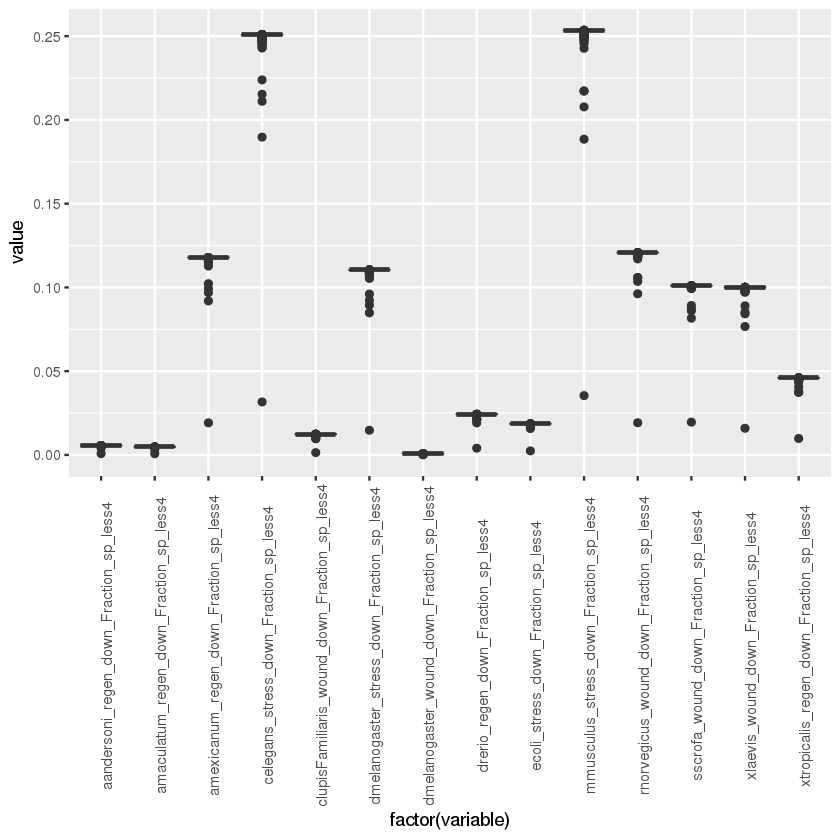

In [31]:
# fractions distributed
meltData_down <- melt(data.frame(scale_spec_exp_down))
p <- ggplot(meltData_down, aes(factor(variable), value)) 
p + geom_boxplot() + theme(axis.text.x = element_text(angle = 90))

Using  as id variables



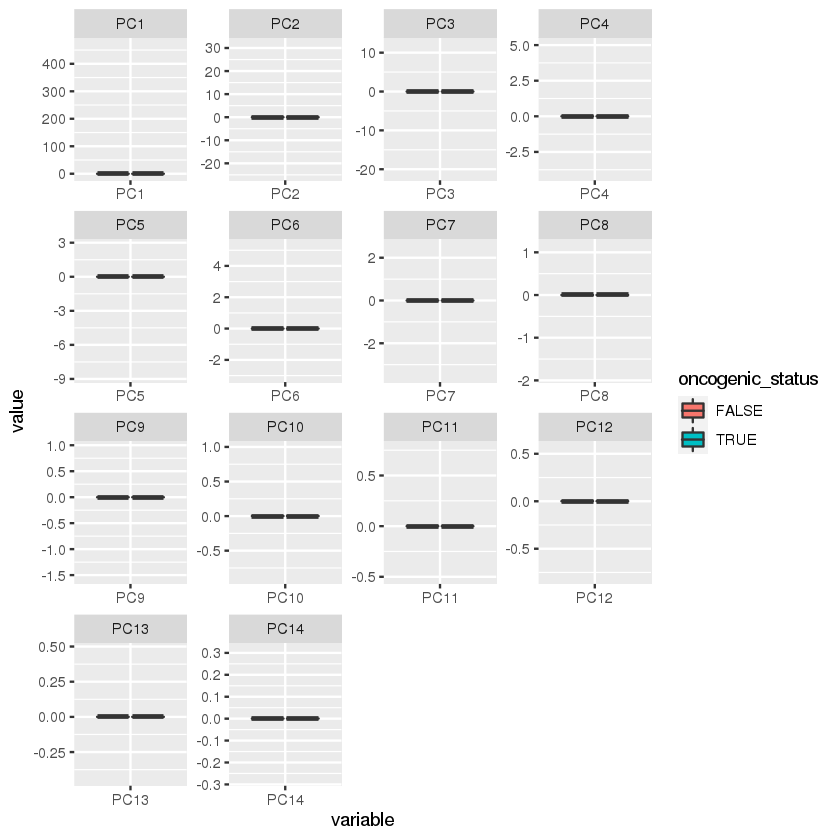

In [32]:
# pcca distribution
pca_melted_down4 <- cbind(melt(as.data.frame(pca_res_spec_exp_down$x)), "oncogenic_status" = rep(fractions_combinedDF_SPEC_EXP$oncogenic_status, ncol(pca_res_spec_exp_down$x)))

ggplot(pca_melted_down4, aes(x=variable, y=value,
                                   fill=oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
stat_compare_means(aes(group = oncogenic_status), label = "p.signif")

Using  as id variables



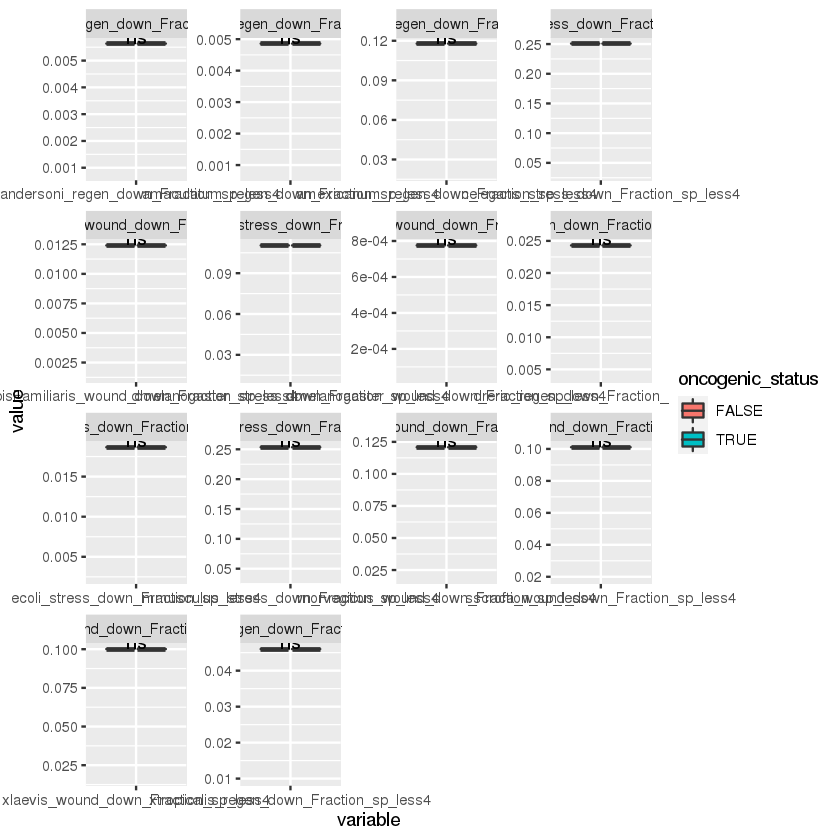

In [33]:
# fractions  distribution  oncogenic vs non
pca_melted_exp_down4_raw <- cbind(melt(data.frame(scale_spec_exp_down)), "oncogenic_status" = rep(fractions_combinedDF_SPEC_EXP$oncogenic_status, ncol(scale_spec_exp_down)))

ggplot(pca_melted_exp_down4_raw, aes(x=variable, y=value,
                                   fill=oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
stat_compare_means(aes(group = oncogenic_status), label = "p.signif")

Using  as id variables



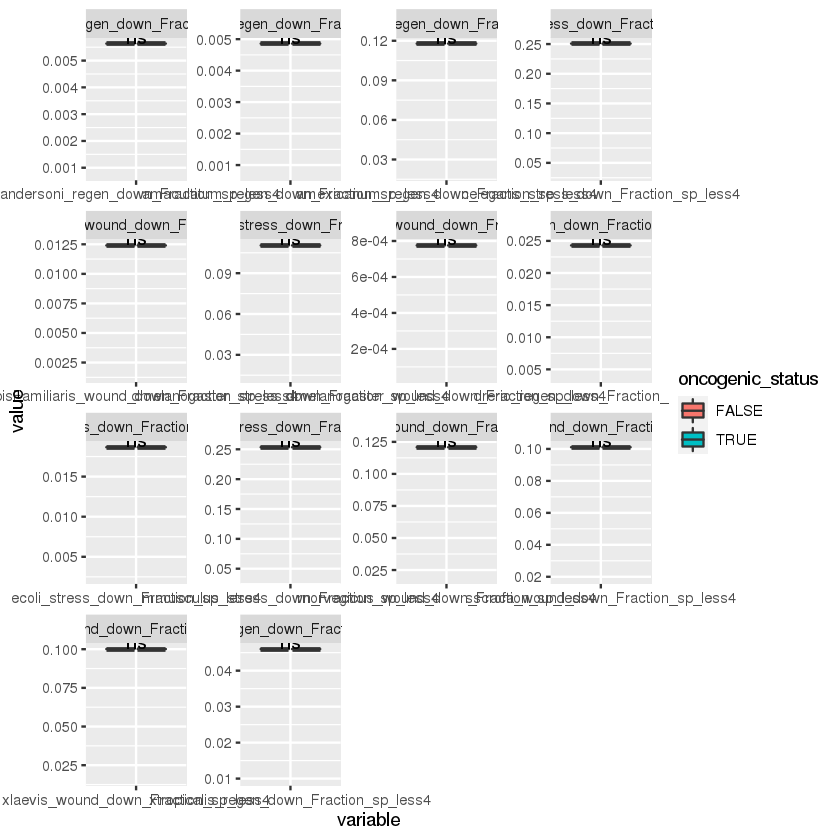

In [34]:
random_pca_melted_exp_down4_raw <- cbind(melt(data.frame(scale_spec_exp_down)), "oncogenic_status" = rep(sample(fractions_combinedDF_SPEC_EXP$oncogenic_status), ncol(scale_spec_exp_down)))

ggplot(random_pca_melted_exp_down4_raw, aes(x=variable, y=value,
                                   fill=oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
stat_compare_means(aes(group = oncogenic_status), label = "p.signif")

Using  as id variables



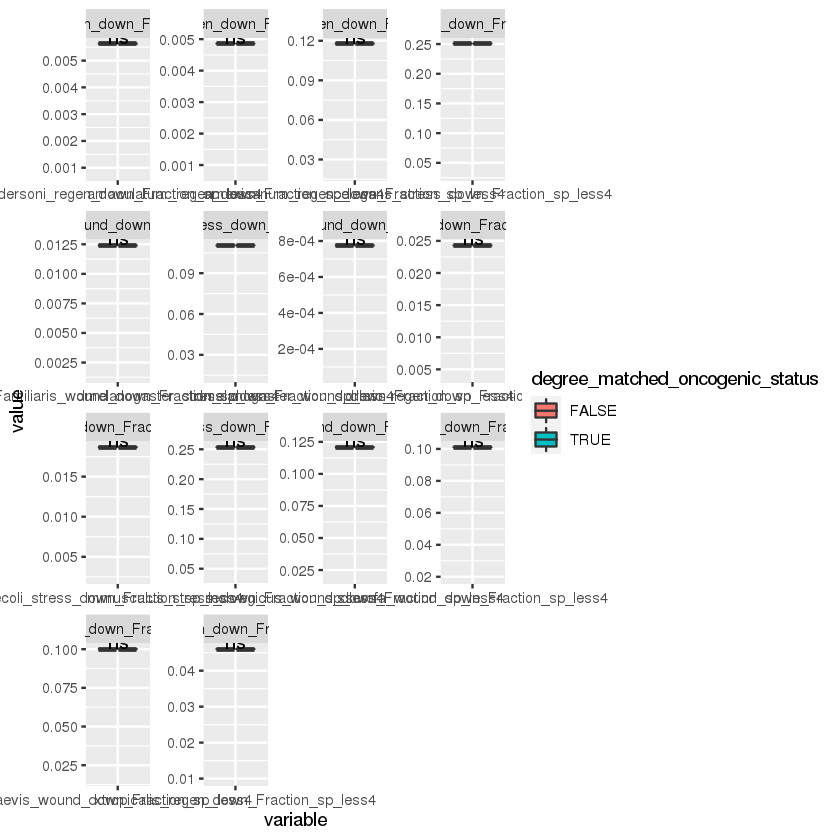

In [35]:
degree_matched_pca_melted_exp_down4_raw <- cbind(melt(data.frame(scale_spec_exp_down)), "degree_matched_oncogenic_status" = rep(fractions_combinedDF_SPEC_EXP$degree_matched_oncogenic_status, ncol(scale_spec_exp_down)))

ggplot(degree_matched_pca_melted_exp_down4_raw, aes(x=variable, y=value,
                                   fill=degree_matched_oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
stat_compare_means(aes(group = degree_matched_oncogenic_status), label = "p.signif")

Using  as id variables



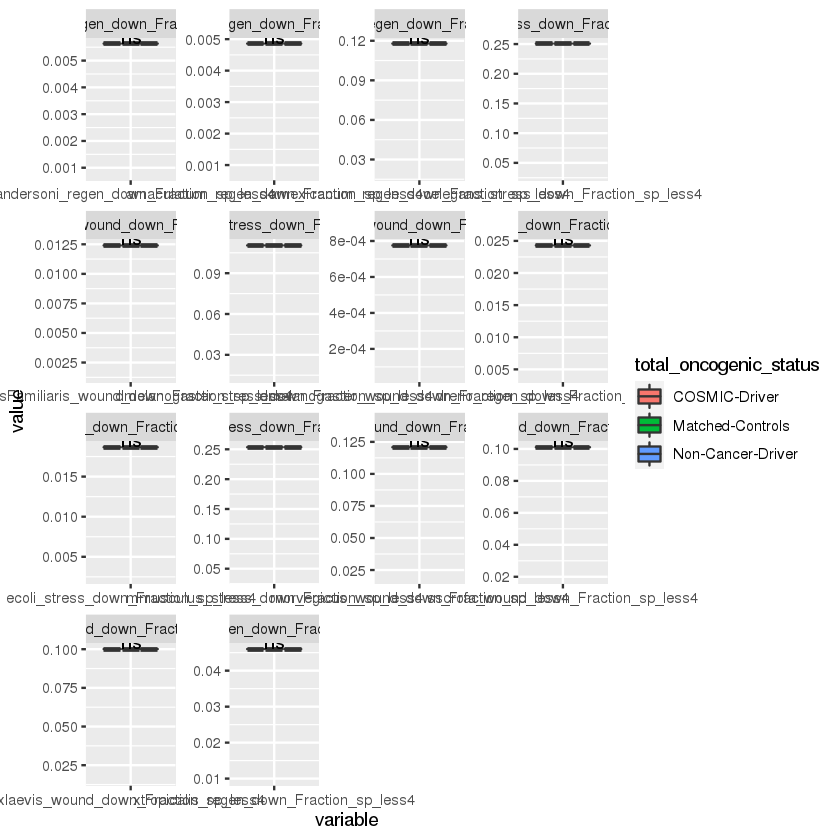

In [36]:
triple_pca_melted_exp_down4_raw <- cbind(melt(data.frame(scale_spec_exp_down)), "total_oncogenic_status" = rep(fractions_combinedDF_SPEC_EXP$total_oncogenic_status, ncol(scale_spec_exp_down)))

ggplot(triple_pca_melted_exp_down4_raw, aes(x=variable, y=value,
                                   fill=total_oncogenic_status)) + 
geom_boxplot(outlier.shape = NA) +
facet_wrap(~variable, scale="free") +
stat_compare_means(aes(group = total_oncogenic_status), label = "p.signif")